In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Teaching & Learning/Machine Learning/Projects (with Tutor Ali Al-Fazly)/Project 4: Developing Machine Learning Pipelines (e.g. data exploration, pre-processing, models etc)/Coursework_1_data.csv')

Data exploration

In [ ]:
df

Administrative  Administrative_Duration  ...  Weekend  Revenue
0                   0                      0.0  ...    False    False
1                   0                      0.0  ...    False    False
2                   0                      0.0  ...    False    False
3                   0                      0.0  ...    False    False
4                   0                      0.0  ...     True    False
...               ...                      ...  ...      ...      ...
12325               3                    145.0  ...     True    False
12326               0                      0.0  ...     True    False
12327               0                      0.0  ...     True    False
12328               4                     75.0  ...    False    False
12329               0                      0.0  ...     True    False

[12330 rows x 18 columns]

In [ ]:
df.info() # Checking to see if there are missing values - We can see that there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# Checking the values in the Visitor Type column, we can see that there are 3 distict values.
# Returning Visitor, New Visitor, and Other. New visitor is the most common value which occurred 10551 times, 
# while Other is the least frequent which only occurred 85 times
df['VisitorType'].value_counts() 

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [ ]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [ ]:
# This gives some statistics about each numerical colum, such as mean, std, minimum value, and maximum value
df.describe()

Administrative  Administrative_Duration  ...        Region   TrafficType
count    12330.000000             12330.000000  ...  12330.000000  12330.000000
mean         2.315166                80.818611  ...      3.147364      4.069586
std          3.321784               176.779107  ...      2.401591      4.025169
min          0.000000                 0.000000  ...      1.000000      1.000000
25%          0.000000                 0.000000  ...      1.000000      2.000000
50%          1.000000                 7.500000  ...      3.000000      2.000000
75%          4.000000                93.256250  ...      4.000000      4.000000
max         27.000000              3398.750000  ...      9.000000     20.000000

[8 rows x 14 columns]

Administrative


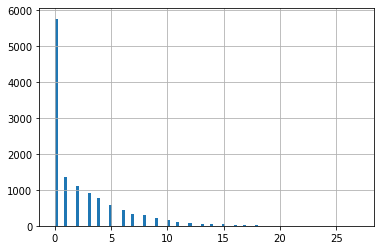

Administrative_Duration


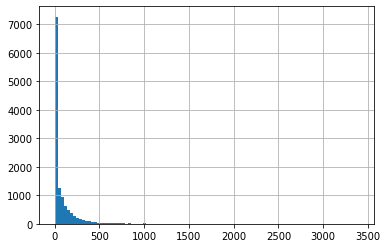

Informational


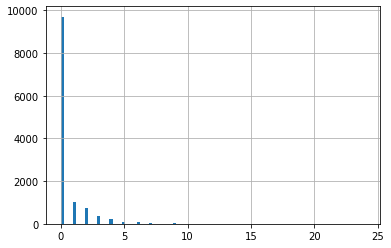

Informational_Duration


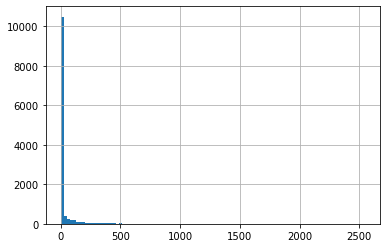

ProductRelated


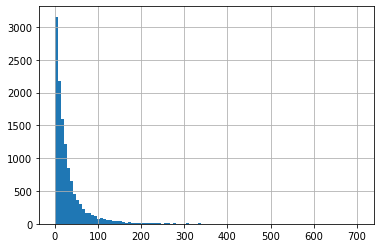

ProductRelated_Duration


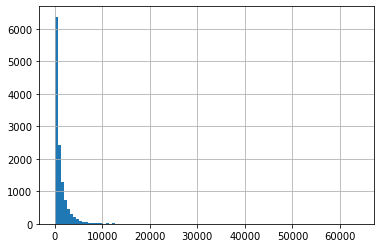

BounceRates


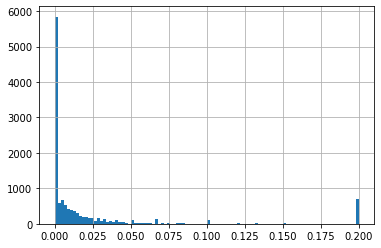

ExitRates


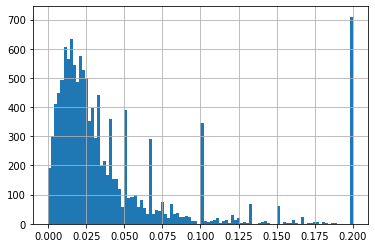

PageValues


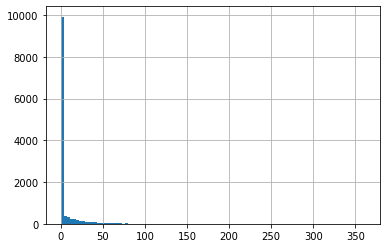

SpecialDay


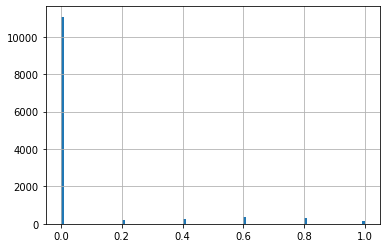

Month


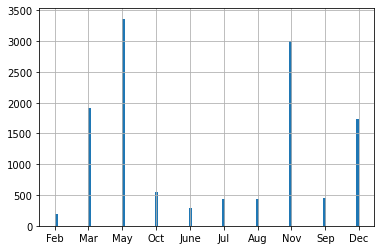

OperatingSystems


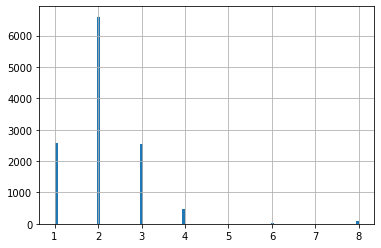

Browser


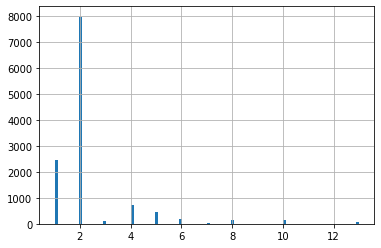

Region


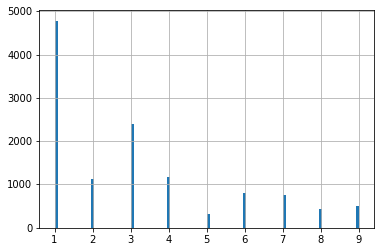

TrafficType


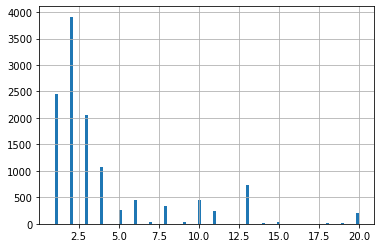

VisitorType


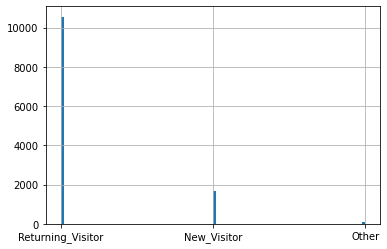

In [ ]:
# Histrograms showing the distribusion of each column (except the last two since we can't plot a histogram of a boolean type).
for col in df.columns[:-2]:
  print(col)
  df[col].hist(bins=100)
  plt.show()

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


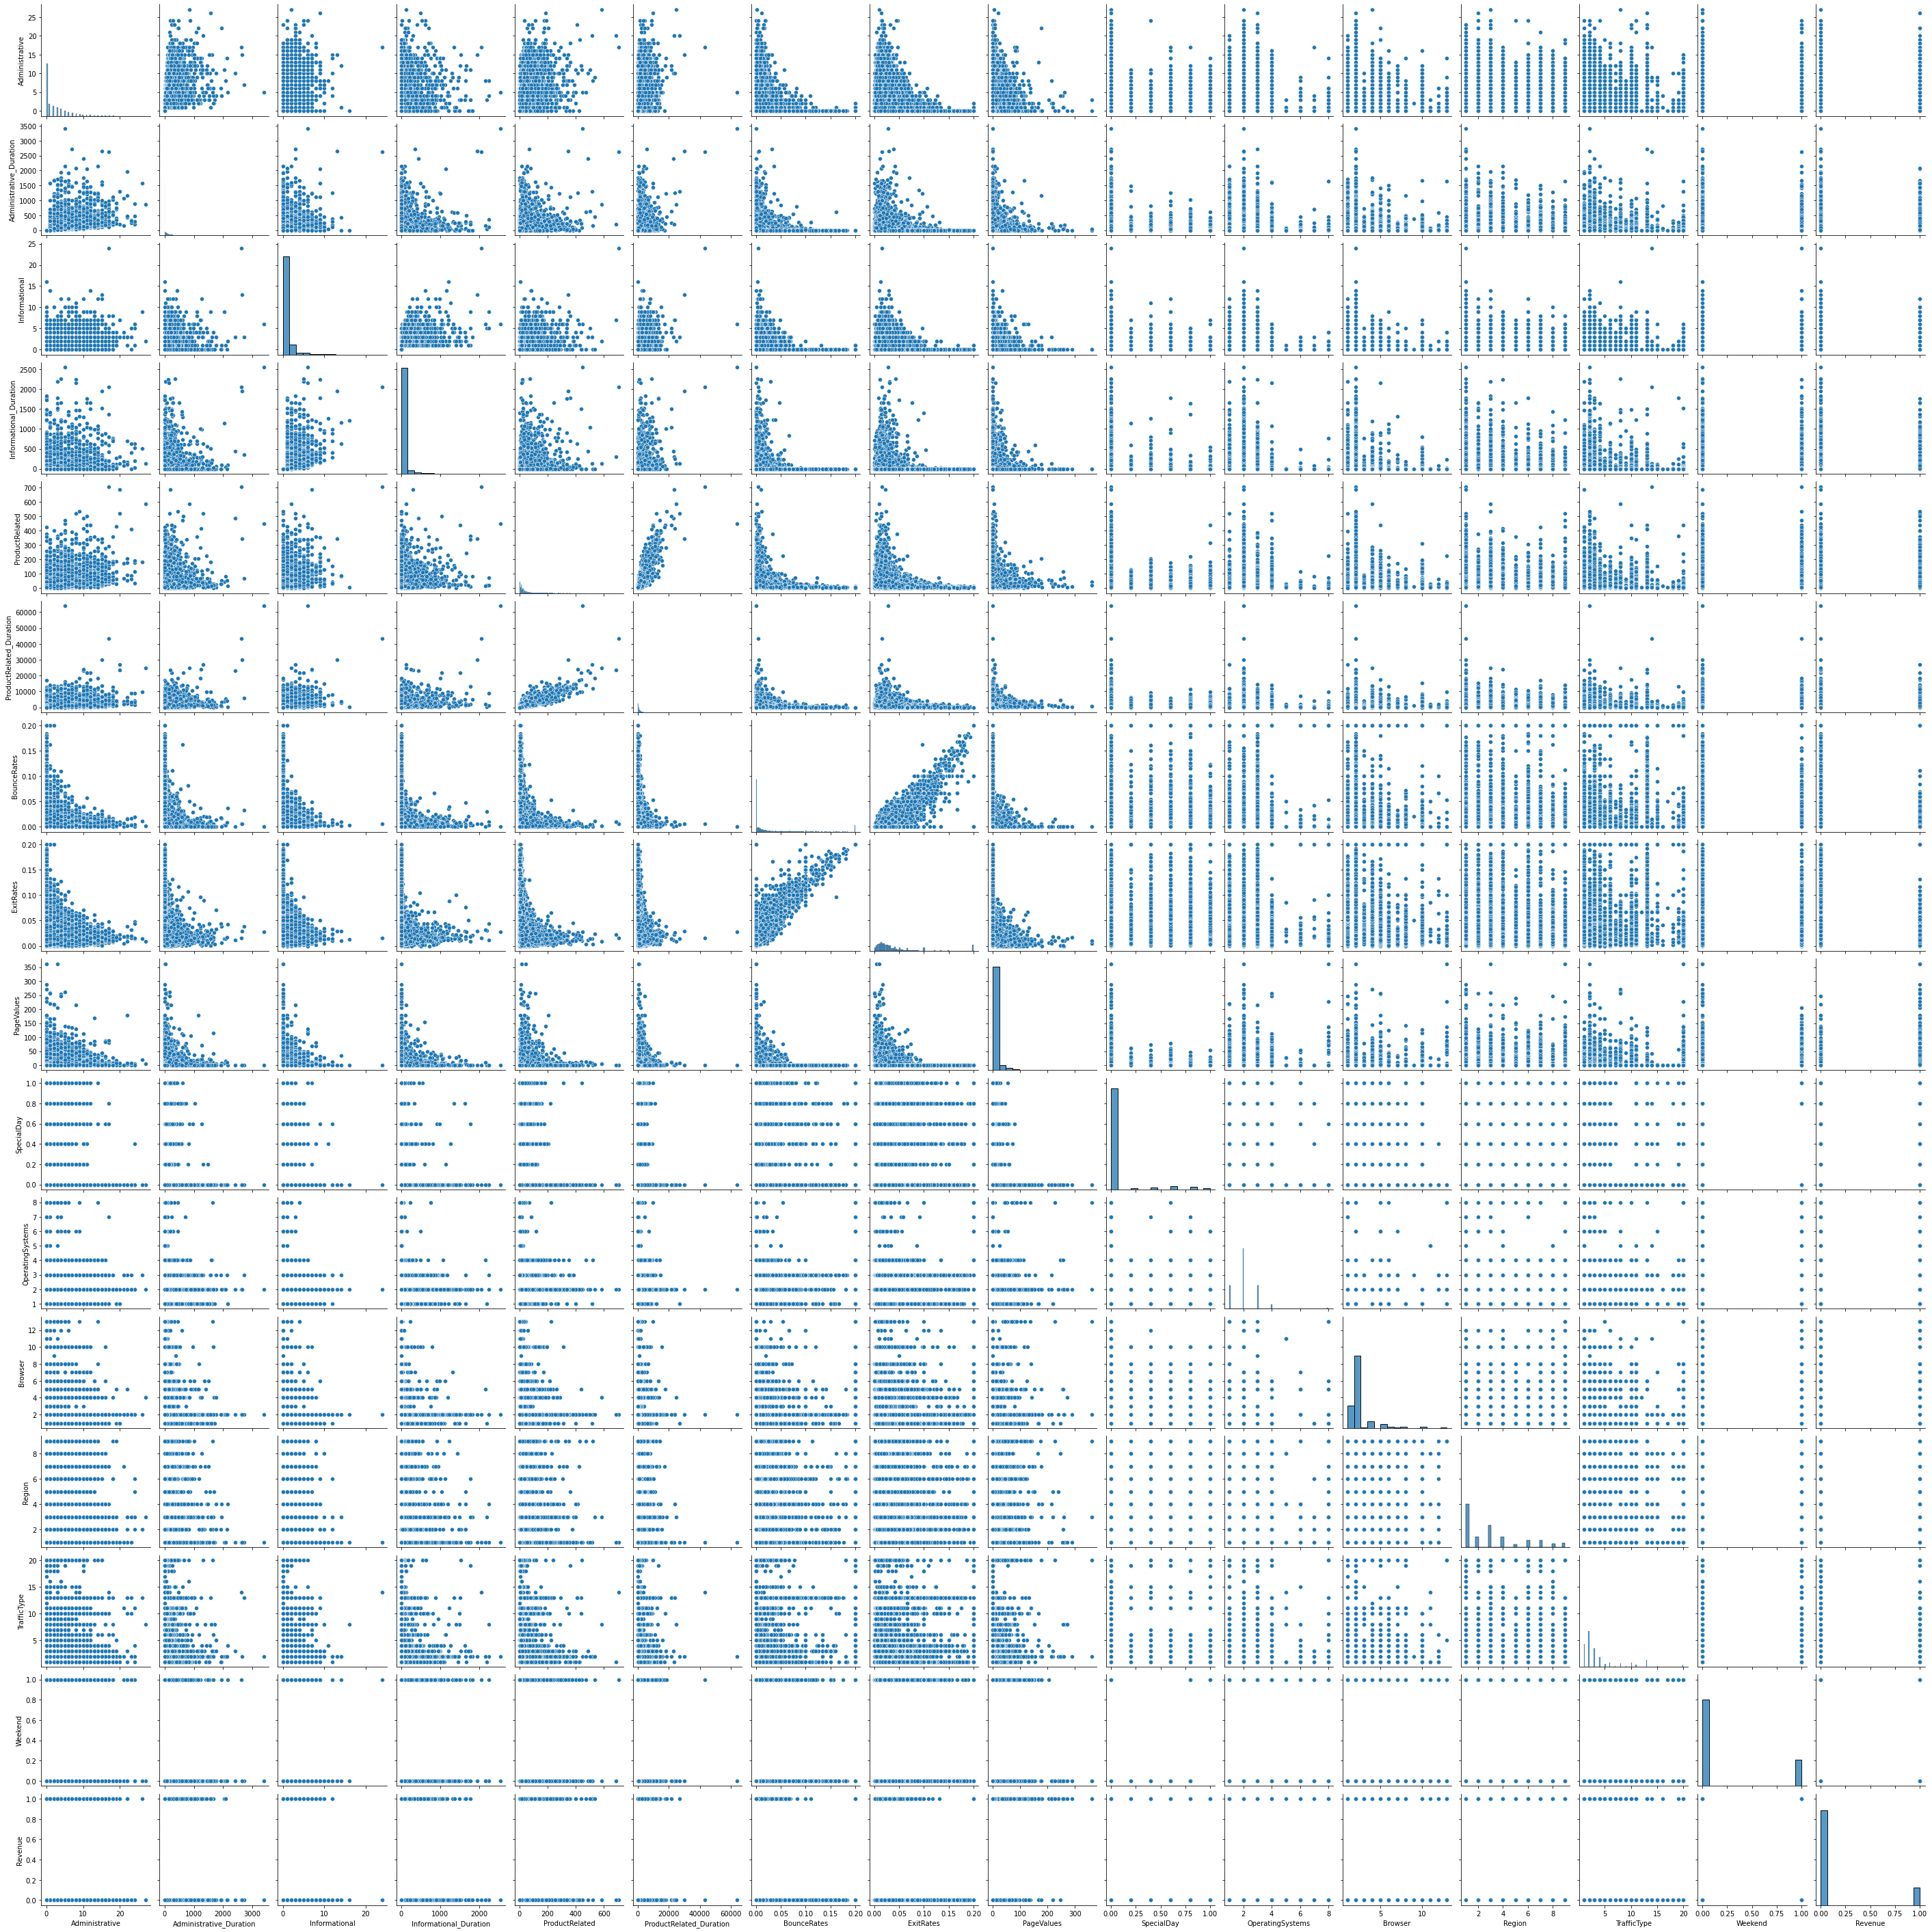

In [ ]:
sns.pairplot(df)

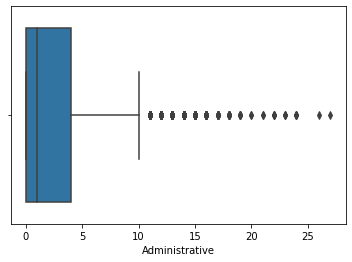

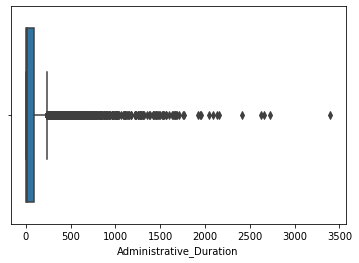

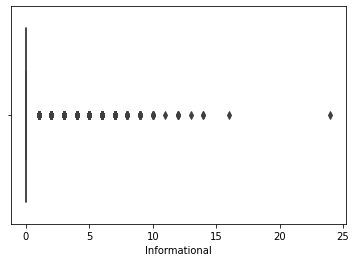

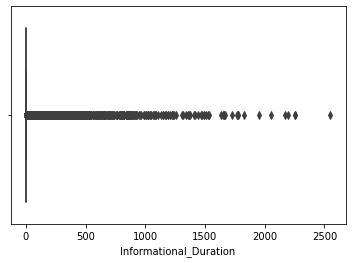

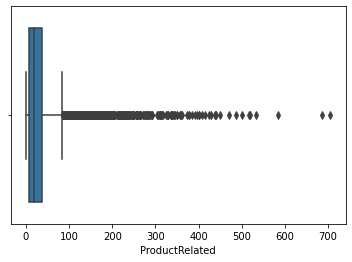

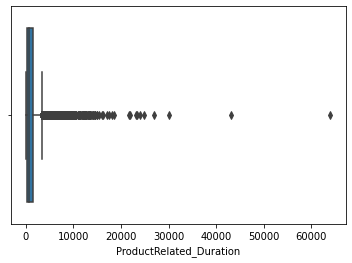

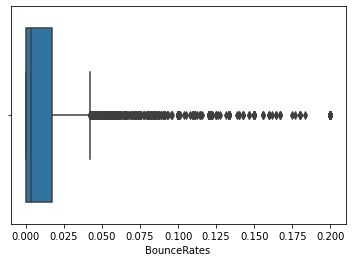

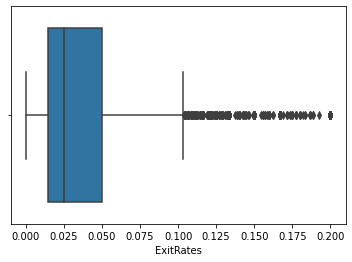

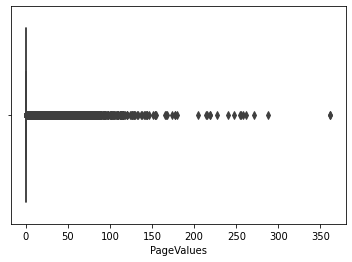

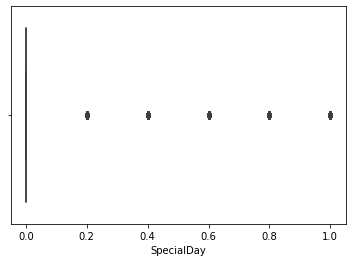

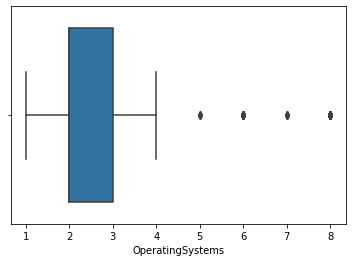

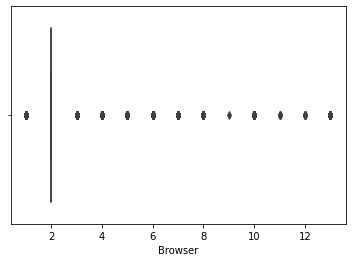

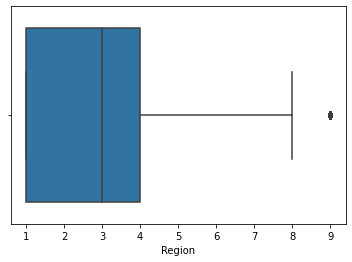

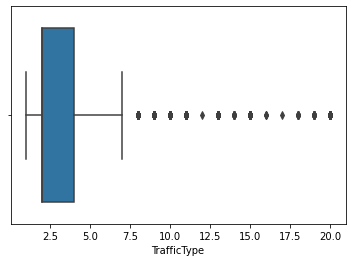

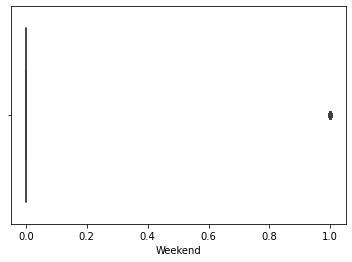

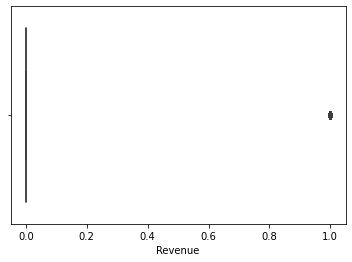

In [ ]:
for col in df.columns:
  if pd.api.types.is_numeric_dtype(df[col]):
    sns.boxplot(x=col, data=df)
    plt.show()

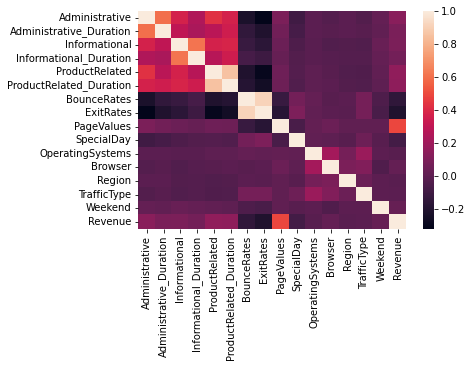

In [ ]:
sns.heatmap(df.corr())

Data preprocessing

In [ ]:
# Converting boolean values to integers by setting the False to 0 and True to 1
df['Weekend'] = df['Weekend'].map({False:0, True:1})
df['Revenue'] = df['Revenue'].map({False:0, True:1})

In [ ]:
# Converting month to numbers
df['Month'] = df['Month'].map({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6,'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12})

In [ ]:
df

Administrative  Administrative_Duration  ...  Weekend  Revenue
0                   0                      0.0  ...        0        0
1                   0                      0.0  ...        0        0
2                   0                      0.0  ...        0        0
3                   0                      0.0  ...        0        0
4                   0                      0.0  ...        1        0
...               ...                      ...  ...      ...      ...
12325               3                    145.0  ...        1        0
12326               0                      0.0  ...        1        0
12327               0                      0.0  ...        1        0
12328               4                     75.0  ...        0        0
12329               0                      0.0  ...        1        0

[12330 rows x 18 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# Converting categorical columns into dummies
# For example, there is a Column called Operating Systems, which has values 1, 2, 3, 4, 5, 6, 7, 8
# The problem with keeping it is that , if we are using Logistic regression for example, the classifier will learn that 
# operating system 8 is more important than operating system 1 and that operating system 4 is in between, while this is not the case,
# and there are arbitary numbers that don't have a specific order.
# Aftet the converting, we now have 8 columns, each column can either be 0 or 1. Operating System 1 will become [1,0,0,0,0,0,0],
# and Operating System 2 will become [0,1,0,0,0,0,0] and Operating System 3 will become [0,0,1,0,0,0,0] and so on. 
# This way, the distance between each operating system is the same and the classifer can give each of them a different weight.
#df = pd.get_dummies(df, columns=['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Month'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df

Administrative  Administrative_Duration  ...  Weekend  Revenue
0                   0                      0.0  ...        0        0
1                   0                      0.0  ...        0        0
2                   0                      0.0  ...        0        0
3                   0                      0.0  ...        0        0
4                   0                      0.0  ...        1        0
...               ...                      ...  ...      ...      ...
12325               3                    145.0  ...        1        0
12326               0                      0.0  ...        1        0
12327               0                      0.0  ...        1        0
12328               4                     75.0  ...        0        0
12329               0                      0.0  ...        1        0

[12330 rows x 18 columns]

Administrative


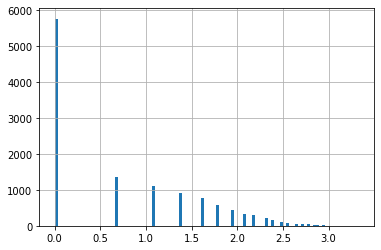

Administrative_Duration


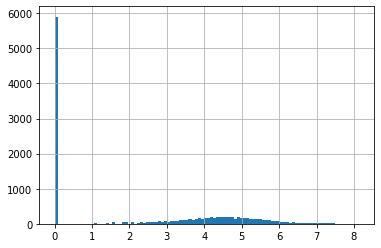

Informational


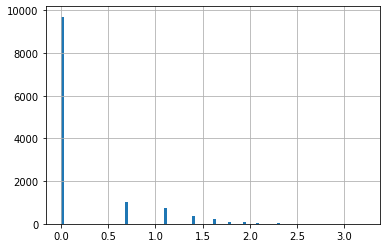

Informational_Duration


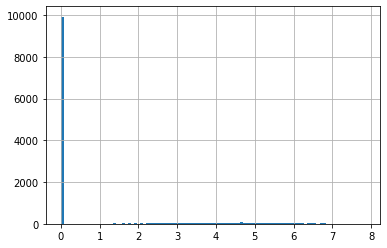

ProductRelated


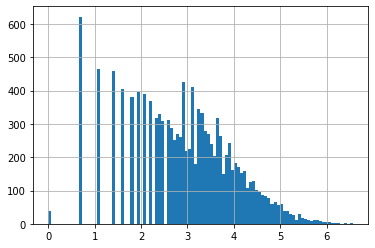

ProductRelated_Duration


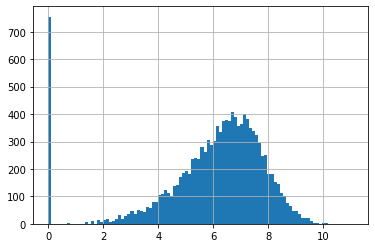

BounceRates


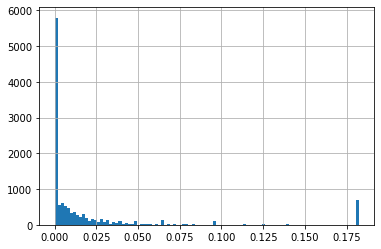

PageValues


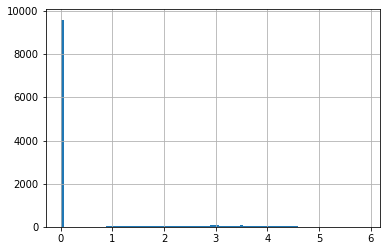

In [ ]:
# Applying logarithm to columns that have a 'power law' distribution (multiple small values, and as the number increases, the frequency decreases)
# The hope is to get a more even distribution and a better classification performance.
for column in ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'PageValues']:
  df[column] = np.log(df[column]+1)
  print(column)
  df[column].hist(bins=100)
  plt.show()

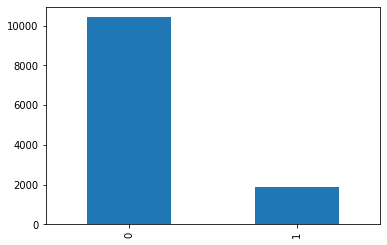

In [ ]:
df['Revenue'].value_counts().plot(kind='bar')

In [ ]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# splitting the data into a training set and a test set, using stratified sampling to ensure that the ratio of positive:negative 
# examples is the same in both the training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

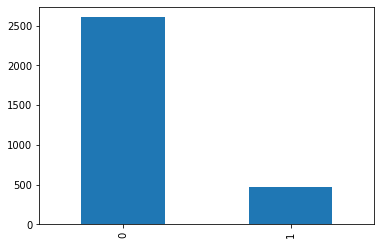

In [ ]:
y_test.value_counts().plot(kind='bar')

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

In [ ]:
# we will be using Scaling for numerical features and encoding for categorical features, hence defining which ones are which
categorical_features = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Month']
numerical_features = [feature for feature in X.columns if feature not in categorical_features]

In [ ]:
scaler = StandardScaler()

In [ ]:
# fitting a standard scaler on the training set (numerical features) to work out the mean and standard deviation of each feature
# then using it to transform (subtract the mean and divide by standard deviation) on the training and test set
X_train_numerical = pd.DataFrame(scaler.fit_transform(X_train[numerical_features]), columns=numerical_features)
X_test_numerical = pd.DataFrame(scaler.transform(X_test[numerical_features]), columns=numerical_features)

Administrative before scaling


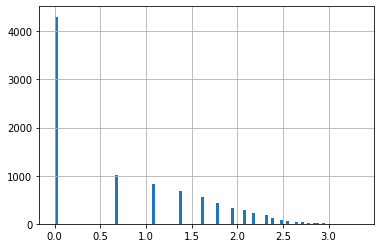

Administrative after scaling


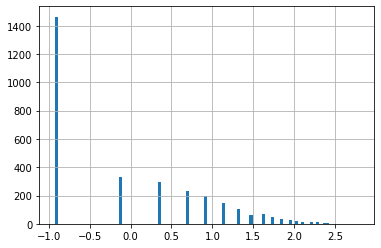

Administrative_Duration before scaling


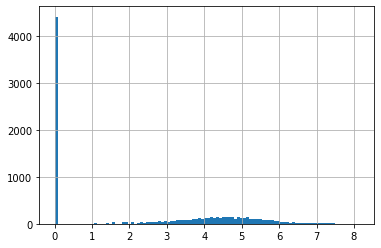

Administrative_Duration after scaling


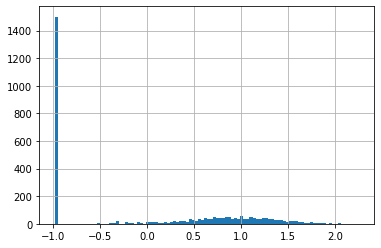

Informational before scaling


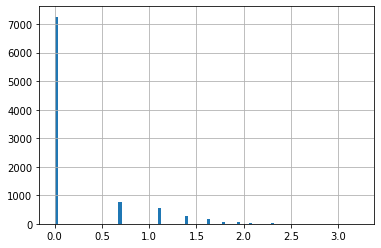

Informational after scaling


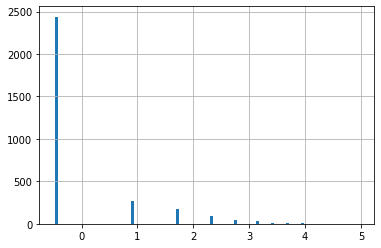

Informational_Duration before scaling


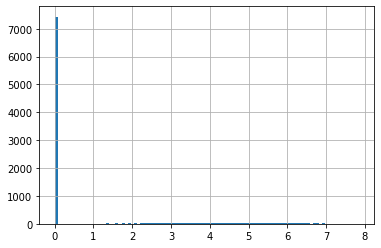

Informational_Duration after scaling


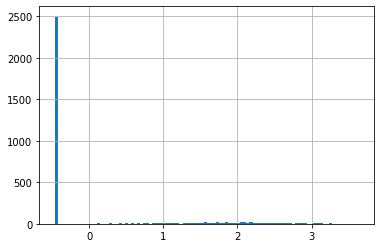

ProductRelated before scaling


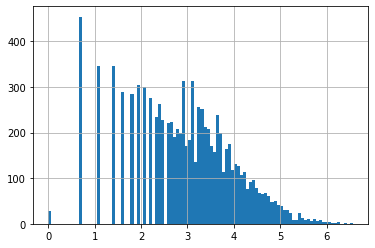

ProductRelated after scaling


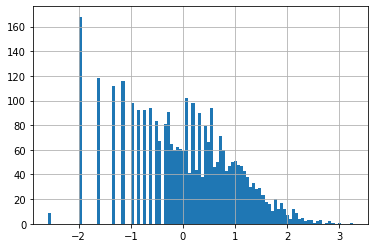

ProductRelated_Duration before scaling


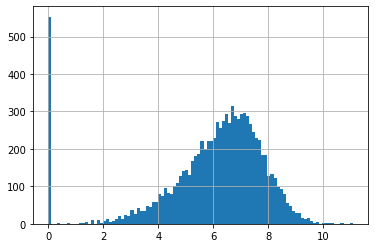

ProductRelated_Duration after scaling


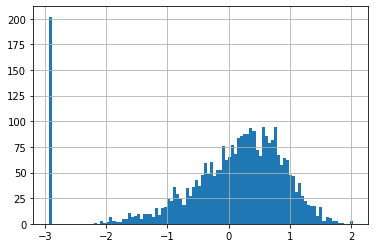

BounceRates before scaling


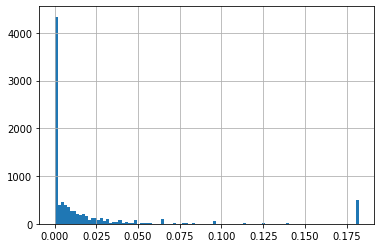

BounceRates after scaling


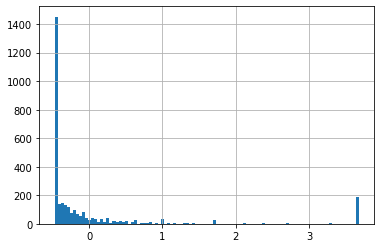

ExitRates before scaling


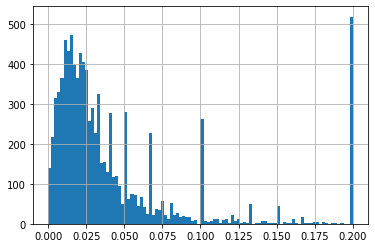

ExitRates after scaling


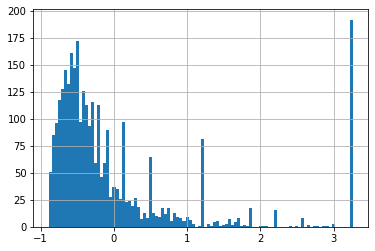

PageValues before scaling


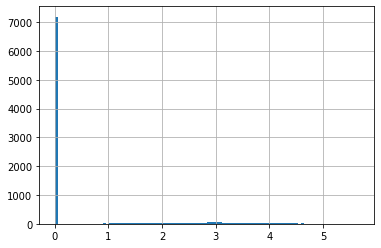

PageValues after scaling


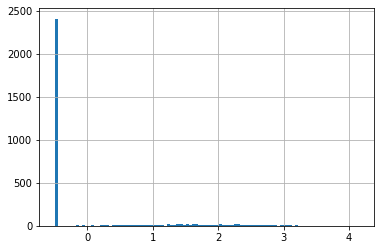

SpecialDay before scaling


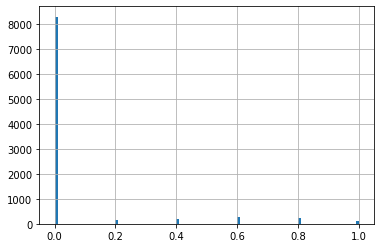

SpecialDay after scaling


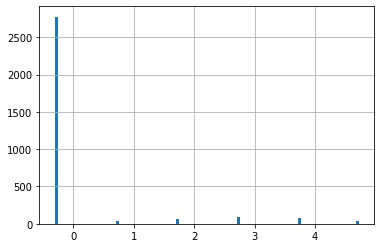

Weekend before scaling


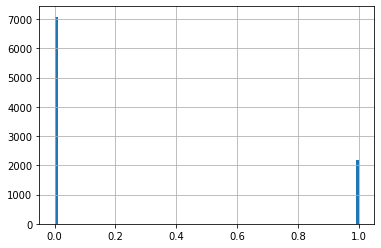

Weekend after scaling


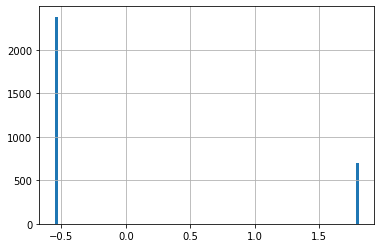

In [ ]:
# plot to compare the numerical feautres beofore and after scaling
for column in numerical_features:
  print(column, 'before scaling')
  X_train[column].hist(bins=100)
  plt.show()
  print(column, 'after scaling')
  X_test_numerical[column].hist(bins=100)
  plt.show()

In [ ]:
# Converting categorical columns into one hot encoding
# For example, there is a Column called Operating Systems, which has values 1, 2, 3, 4, 5, 6, 7, 8
# The problem with keeping it is that , if we are using Logistic regression for example, the classifier will learn that 
# operating system 8 is more important than operating system 1 and that operating system 4 is in between, while this is not the case,
# and there are arbitary numbers that don't have a specific order.
# Aftet the converting, we now have 8 columns, each column can either be 0 or 1. Operating System 1 will become [1,0,0,0,0,0,0],
# and Operating System 2 will become [0,1,0,0,0,0,0] and Operating System 3 will become [0,0,1,0,0,0,0] and so on. 
# This way, the distance between each operating system is the same and the classifer can give each of them a different weight.

encoder = OneHotEncoder(handle_unknown='ignore')

In [ ]:
# fitting on the training set (getting a list of feature names and their values) and 
# transforming on the train and test set ensure that we have the exact same columns in both training and test set
# even if we have extra or missing values in the test
X_train_categorical = encoder.fit_transform(X_train[categorical_features]).toarray()
X_test_categorical = encoder.transform(X_test[categorical_features]).toarray()

In [ ]:
X_train_categorical.shape

(9247, 61)

In [ ]:
X_test_categorical.shape

(3083, 61)

In [ ]:
X_train_categorical

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [ ]:
pd.get_dummies(X_train[categorical_features], columns=categorical_features)

OperatingSystems_1  OperatingSystems_2  ...  Month_11  Month_12
5153                    0                   1  ...         0         0
6626                    0                   0  ...         0         0
8665                    0                   1  ...         0         1
12133                   0                   1  ...         1         0
3610                    0                   1  ...         0         0
...                   ...                 ...  ...       ...       ...
2181                    1                   0  ...         0         0
9102                    0                   0  ...         1         0
3546                    1                   0  ...         0         0
4748                    1                   0  ...         0         0
9427                    0                   1  ...         0         1

[9247 rows x 61 columns]

In [ ]:
pd.get_dummies(X_test[categorical_features], columns=categorical_features)

OperatingSystems_1  OperatingSystems_2  ...  Month_11  Month_12
2534                    0                   1  ...         0         0
6695                    0                   0  ...         0         0
679                     0                   1  ...         0         0
11337                   1                   0  ...         1         0
5389                    1                   0  ...         0         0
...                   ...                 ...  ...       ...       ...
12098                   1                   0  ...         0         1
1252                    0                   1  ...         0         0
1551                    1                   0  ...         0         0
2246                    0                   1  ...         0         0
8023                    0                   1  ...         0         1

[3083 rows x 61 columns]

In [ ]:
# concatenating the numerical and categorical features after scaling and encoding
X_train = np.concatenate([X_train_numerical.values,X_train_categorical], axis=1)
X_test = np.concatenate([X_test_numerical.values,X_test_categorical], axis=1)

In [ ]:
X_train.shape

(9247, 72)

In [ ]:
X_test.shape

(3083, 72)

In [ ]:
# Oversampling the training set by randomly duplicating positive examples to have the same number of them as negative examples
# and therefore a balanced training set
oversampler = RandomOverSampler()

In [ ]:
X_train_oversampled , y_train_oversampled = oversampler.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_oversampled.shape

(15632, 72)

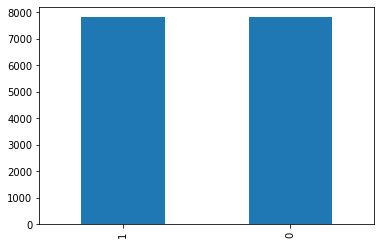

In [ ]:
# we can see that the traning set after oversampling is now balanced
pd.Series(y_train_oversampled).value_counts().plot(kind='bar')

In [ ]:
# splitting the test set into a validation and a test set of equal sizes
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test)

Model Training

In [ ]:
# importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1303
           1       0.67      0.50      0.57       238

    accuracy                           0.89      1541
   macro avg       0.79      0.73      0.75      1541
weighted avg       0.88      0.89      0.88      1541



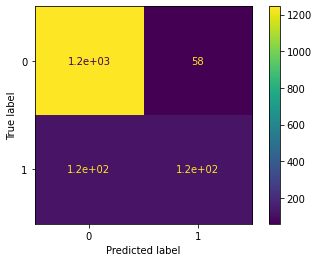

In [ ]:
# creating a Logistic regression model with default parameters
lr = LogisticRegression(max_iter=500)
# training the model (without oversampling)
lr.fit(X_train, y_train)
# evaluate on the validation set
print(classification_report(y_val, lr.predict(X_val)))
plot_confusion_matrix(lr, X_val, y_val)

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1303
           1       0.53      0.72      0.61       238

    accuracy                           0.86      1541
   macro avg       0.74      0.80      0.76      1541
weighted avg       0.88      0.86      0.87      1541



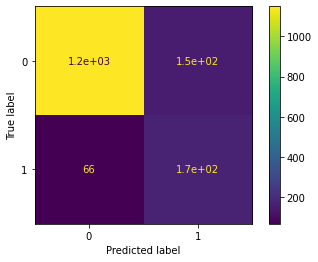

In [ ]:
# creating a Logistic regression model with default parameters
lr = LogisticRegression(max_iter=500)
# training the model (with oversampling)
lr.fit(X_train_oversampled, y_train_oversampled)
# evaluate on the validation set
print(classification_report(y_val, lr.predict(X_val)))
plot_confusion_matrix(lr, X_val, y_val)

C=1, class_weight=None, oversample=True
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1303
           1       0.53      0.72      0.61       238

    accuracy                           0.86      1541
   macro avg       0.74      0.80      0.76      1541
weighted avg       0.88      0.86      0.87      1541



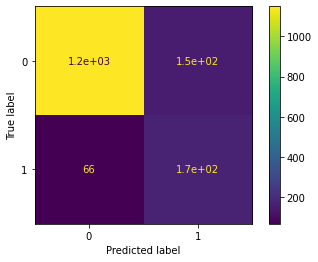

C=1, class_weight=None, oversample=False
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1303
           1       0.67      0.50      0.57       238

    accuracy                           0.89      1541
   macro avg       0.79      0.73      0.75      1541
weighted avg       0.88      0.89      0.88      1541



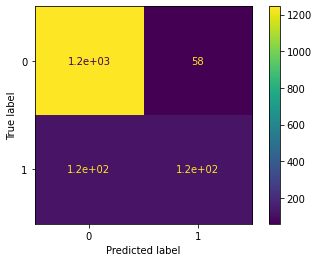

C=1, class_weight=balanced, oversample=True
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1303
           1       0.53      0.72      0.61       238

    accuracy                           0.86      1541
   macro avg       0.74      0.80      0.76      1541
weighted avg       0.88      0.86      0.87      1541



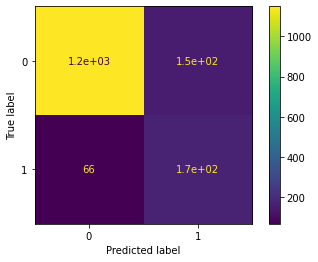

C=1, class_weight=balanced, oversample=False
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1303
           1       0.53      0.74      0.62       238

    accuracy                           0.86      1541
   macro avg       0.74      0.81      0.77      1541
weighted avg       0.88      0.86      0.87      1541



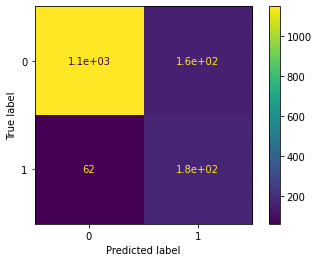

C=1, class_weight={0: 2, 1: 1}, oversample=True
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1303
           1       0.59      0.63      0.61       238

    accuracy                           0.87      1541
   macro avg       0.76      0.78      0.77      1541
weighted avg       0.88      0.87      0.88      1541



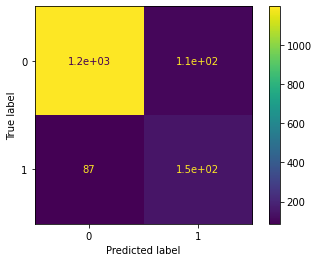

C=1, class_weight={0: 2, 1: 1}, oversample=False
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1303
           1       0.78      0.35      0.49       238

    accuracy                           0.88      1541
   macro avg       0.84      0.67      0.71      1541
weighted avg       0.87      0.88      0.87      1541



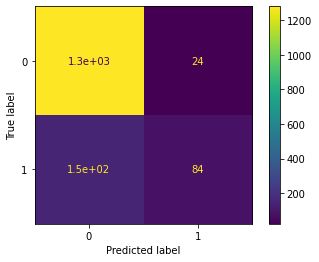

C=1, class_weight={0: 4, 1: 1}, oversample=True
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1303
           1       0.65      0.56      0.60       238

    accuracy                           0.89      1541
   macro avg       0.79      0.75      0.77      1541
weighted avg       0.88      0.89      0.88      1541



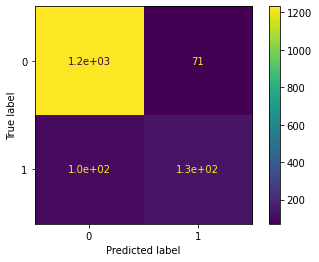

C=1, class_weight={0: 4, 1: 1}, oversample=False
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1303
           1       0.82      0.20      0.32       238

    accuracy                           0.87      1541
   macro avg       0.85      0.59      0.62      1541
weighted avg       0.86      0.87      0.83      1541



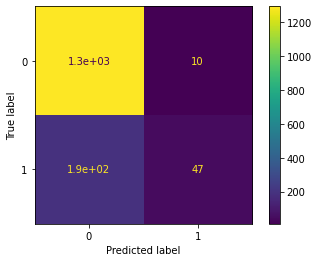

C=10, class_weight=None, oversample=True
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1303
           1       0.53      0.72      0.61       238

    accuracy                           0.86      1541
   macro avg       0.74      0.80      0.76      1541
weighted avg       0.88      0.86      0.87      1541



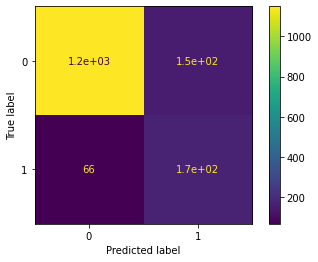

C=10, class_weight=None, oversample=False
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1303
           1       0.68      0.50      0.57       238

    accuracy                           0.89      1541
   macro avg       0.79      0.73      0.75      1541
weighted avg       0.88      0.89      0.88      1541



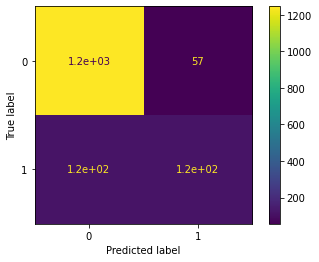

C=10, class_weight=balanced, oversample=True
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1303
           1       0.53      0.72      0.61       238

    accuracy                           0.86      1541
   macro avg       0.74      0.80      0.76      1541
weighted avg       0.88      0.86      0.87      1541



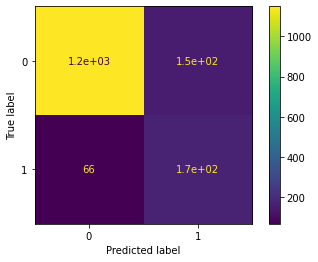

C=10, class_weight=balanced, oversample=False
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1303
           1       0.53      0.74      0.62       238

    accuracy                           0.86      1541
   macro avg       0.74      0.81      0.77      1541
weighted avg       0.88      0.86      0.87      1541



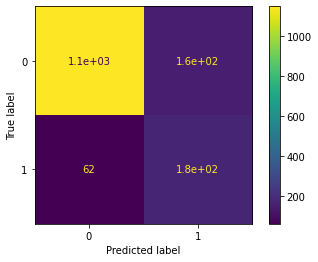

C=10, class_weight={0: 2, 1: 1}, oversample=True
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1303
           1       0.58      0.63      0.61       238

    accuracy                           0.87      1541
   macro avg       0.76      0.78      0.77      1541
weighted avg       0.88      0.87      0.88      1541



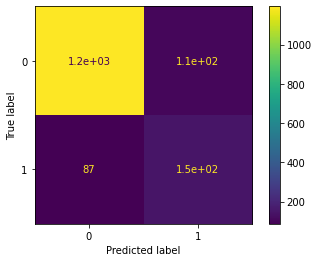

C=10, class_weight={0: 2, 1: 1}, oversample=False
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1303
           1       0.78      0.36      0.49       238

    accuracy                           0.89      1541
   macro avg       0.84      0.67      0.71      1541
weighted avg       0.88      0.89      0.87      1541



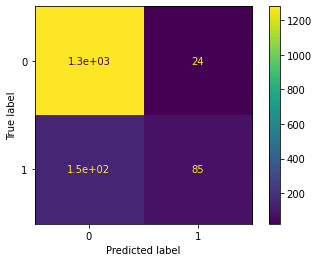

C=10, class_weight={0: 4, 1: 1}, oversample=True
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1303
           1       0.65      0.56      0.60       238

    accuracy                           0.89      1541
   macro avg       0.79      0.75      0.77      1541
weighted avg       0.88      0.89      0.88      1541



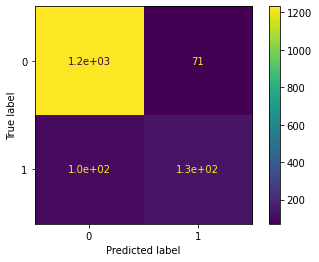

C=10, class_weight={0: 4, 1: 1}, oversample=False
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1303
           1       0.82      0.20      0.32       238

    accuracy                           0.87      1541
   macro avg       0.85      0.59      0.62      1541
weighted avg       0.86      0.87      0.83      1541



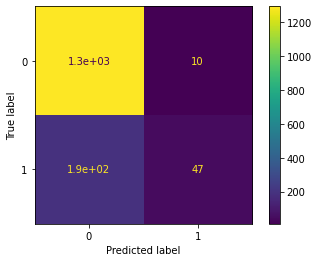

C=0.1, class_weight=None, oversample=True
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1303
           1       0.53      0.72      0.61       238

    accuracy                           0.86      1541
   macro avg       0.74      0.80      0.76      1541
weighted avg       0.88      0.86      0.87      1541



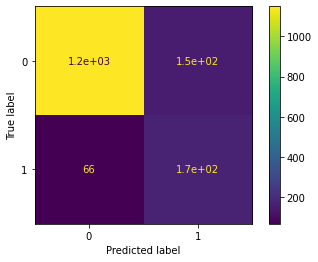

C=0.1, class_weight=None, oversample=False
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1303
           1       0.68      0.50      0.57       238

    accuracy                           0.89      1541
   macro avg       0.79      0.73      0.75      1541
weighted avg       0.88      0.89      0.88      1541



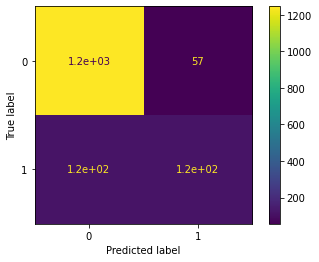

C=0.1, class_weight=balanced, oversample=True
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1303
           1       0.53      0.72      0.61       238

    accuracy                           0.86      1541
   macro avg       0.74      0.80      0.76      1541
weighted avg       0.88      0.86      0.87      1541



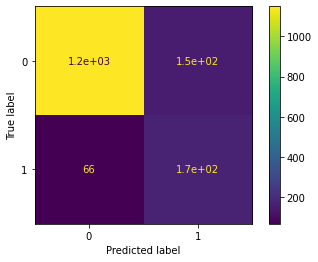

C=0.1, class_weight=balanced, oversample=False
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1303
           1       0.53      0.73      0.61       238

    accuracy                           0.86      1541
   macro avg       0.74      0.81      0.76      1541
weighted avg       0.88      0.86      0.87      1541



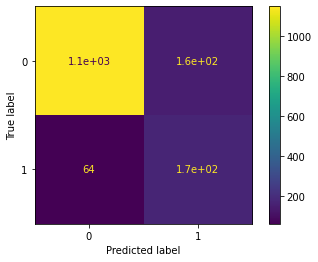

C=0.1, class_weight={0: 2, 1: 1}, oversample=True
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1303
           1       0.58      0.64      0.61       238

    accuracy                           0.87      1541
   macro avg       0.76      0.78      0.77      1541
weighted avg       0.88      0.87      0.88      1541



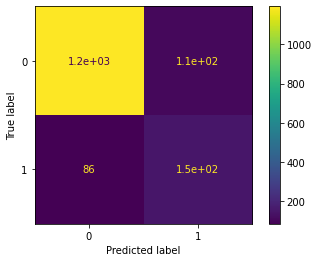

C=0.1, class_weight={0: 2, 1: 1}, oversample=False
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1303
           1       0.78      0.36      0.49       238

    accuracy                           0.89      1541
   macro avg       0.84      0.67      0.71      1541
weighted avg       0.88      0.89      0.87      1541



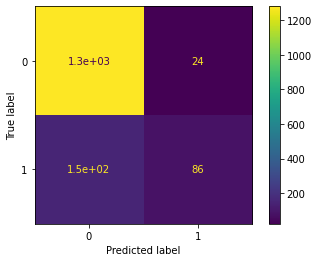

C=0.1, class_weight={0: 4, 1: 1}, oversample=True
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1303
           1       0.65      0.57      0.61       238

    accuracy                           0.89      1541
   macro avg       0.79      0.76      0.77      1541
weighted avg       0.88      0.89      0.88      1541



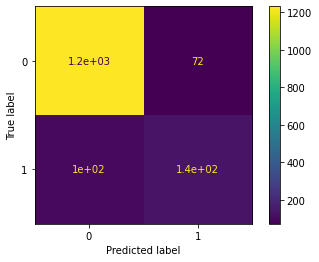

C=0.1, class_weight={0: 4, 1: 1}, oversample=False
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1303
           1       0.82      0.19      0.31       238

    accuracy                           0.87      1541
   macro avg       0.84      0.59      0.62      1541
weighted avg       0.86      0.87      0.83      1541



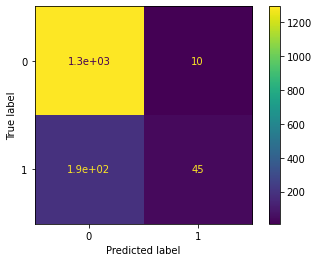

In [ ]:
# trying multiple values of hyperparameters for Logistic regression
for C in [1, 10, 0.1]:
  for class_weight in [None, 'balanced', {0:2, 1:1}, {0:4, 1:1}]:
    for oversample in [True, False]:
      # creating a Logistic regression model with default parameters
      lr = LogisticRegression(C=C, class_weight=class_weight, max_iter=500)
      # training the model
      if oversample:
        lr.fit(X_train_oversampled, y_train_oversampled)
      else:
        lr.fit(X_train, y_train)
      print(f"C={C}, class_weight={class_weight}, oversample={oversample}")
      # evaluate on the validation set
      print(classification_report(y_val, lr.predict(X_val)))
      plot_confusion_matrix(lr, X_val, y_val)
      plt.show()

So far, with logistic regresssion, the best parameters are
C=0.1, class_weight={0: 2, 1: 1}, oversample=True

The F1 score for the postive class is 0.65 and the classification report is:
```
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1303
           1       0.61      0.70      0.65       238

    accuracy                           0.89      1541
   macro avg       0.78      0.81      0.79      1541
weighted avg       0.89      0.89      0.89      1541
```

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=1, class_weight=None, oversample=True, kernel=linear
              precision    recall  f1-score   support

           0       0.87      0.51      0.64      1303
           1       0.18      0.59      0.27       238

    accuracy                           0.52      1541
   macro avg       0.53      0.55      0.46      1541
weighted avg       0.76      0.52      0.59      1541



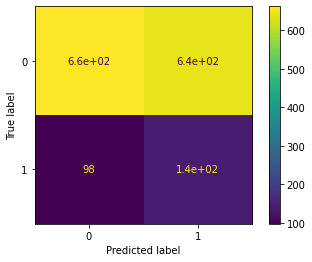

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=1, class_weight=None, oversample=True, kernel=poly
              precision    recall  f1-score   support

           0       0.89      0.04      0.08      1303
           1       0.16      0.97      0.27       238

    accuracy                           0.18      1541
   macro avg       0.52      0.51      0.17      1541
weighted avg       0.77      0.18      0.11      1541



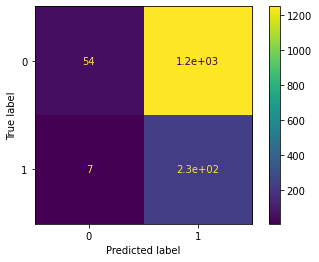

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=1, class_weight=None, oversample=True, kernel=rbf
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1303
           1       0.45      0.61      0.52       238

    accuracy                           0.82      1541
   macro avg       0.68      0.74      0.70      1541
weighted avg       0.85      0.82      0.83      1541



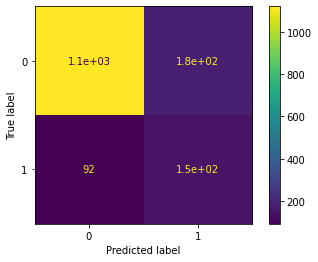

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=1, class_weight=None, oversample=False, kernel=linear
              precision    recall  f1-score   support

           0       0.91      0.55      0.69      1303
           1       0.22      0.69      0.34       238

    accuracy                           0.57      1541
   macro avg       0.56      0.62      0.51      1541
weighted avg       0.80      0.57      0.63      1541



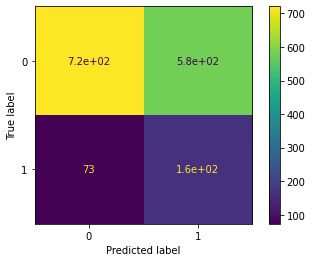

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=1, class_weight=None, oversample=False, kernel=poly
              precision    recall  f1-score   support

           0       0.89      0.09      0.16      1303
           1       0.16      0.94      0.27       238

    accuracy                           0.22      1541
   macro avg       0.52      0.51      0.22      1541
weighted avg       0.78      0.22      0.18      1541



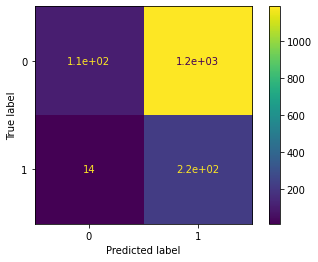

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=1, class_weight=None, oversample=False, kernel=rbf
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1303
           1       0.45      0.60      0.51       238

    accuracy                           0.82      1541
   macro avg       0.69      0.73      0.70      1541
weighted avg       0.85      0.82      0.83      1541



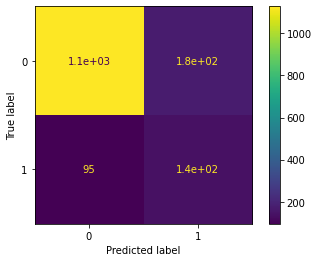

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=1, class_weight=balanced, oversample=True, kernel=linear
              precision    recall  f1-score   support

           0       0.87      0.51      0.64      1303
           1       0.18      0.59      0.27       238

    accuracy                           0.52      1541
   macro avg       0.53      0.55      0.46      1541
weighted avg       0.76      0.52      0.59      1541



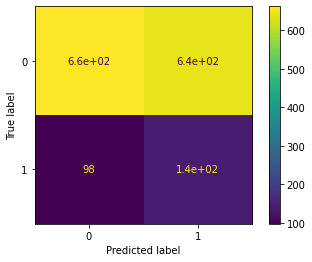

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=1, class_weight=balanced, oversample=True, kernel=poly
              precision    recall  f1-score   support

           0       0.89      0.04      0.08      1303
           1       0.16      0.97      0.27       238

    accuracy                           0.18      1541
   macro avg       0.52      0.51      0.17      1541
weighted avg       0.77      0.18      0.11      1541



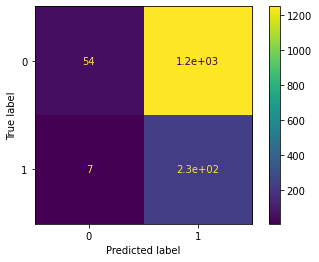

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=1, class_weight=balanced, oversample=True, kernel=rbf
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1303
           1       0.45      0.61      0.52       238

    accuracy                           0.82      1541
   macro avg       0.68      0.74      0.70      1541
weighted avg       0.85      0.82      0.83      1541



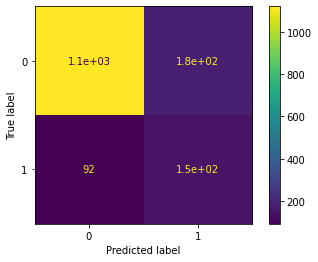

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=1, class_weight=balanced, oversample=False, kernel=linear
              precision    recall  f1-score   support

           0       0.90      0.42      0.58      1303
           1       0.19      0.76      0.31       238

    accuracy                           0.47      1541
   macro avg       0.55      0.59      0.44      1541
weighted avg       0.79      0.47      0.53      1541



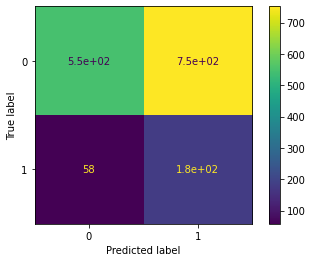

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=1, class_weight=balanced, oversample=False, kernel=poly
              precision    recall  f1-score   support

           0       0.83      0.10      0.18      1303
           1       0.15      0.89      0.26       238

    accuracy                           0.22      1541
   macro avg       0.49      0.49      0.22      1541
weighted avg       0.72      0.22      0.19      1541



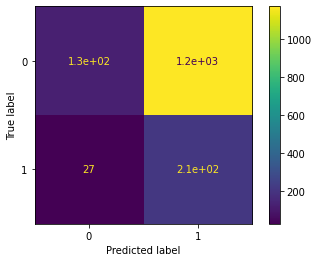

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C=1, class_weight=balanced, oversample=False, kernel=rbf
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1303
           1       0.15      1.00      0.27       238

    accuracy                           0.15      1541
   macro avg       0.08      0.50      0.13      1541
weighted avg       0.02      0.15      0.04      1541



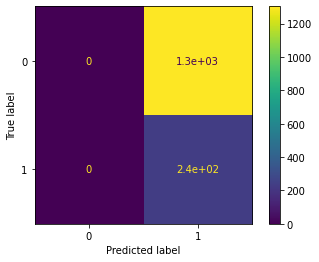

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=1, class_weight={0: 2, 1: 1}, oversample=True, kernel=linear
              precision    recall  f1-score   support

           0       0.87      0.58      0.70      1303
           1       0.19      0.53      0.28       238

    accuracy                           0.57      1541
   macro avg       0.53      0.56      0.49      1541
weighted avg       0.77      0.57      0.63      1541



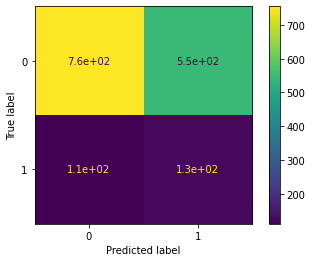

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C=1, class_weight={0: 2, 1: 1}, oversample=True, kernel=poly
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



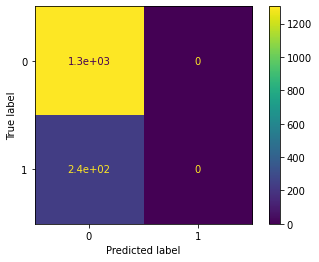

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C=1, class_weight={0: 2, 1: 1}, oversample=True, kernel=rbf
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



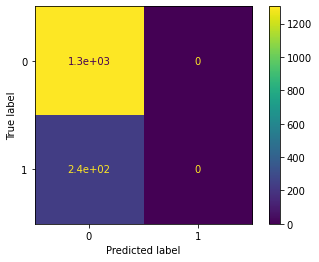

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=1, class_weight={0: 2, 1: 1}, oversample=False, kernel=linear
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1303
           1       0.26      0.55      0.35       238

    accuracy                           0.69      1541
   macro avg       0.58      0.63      0.57      1541
weighted avg       0.80      0.69      0.73      1541



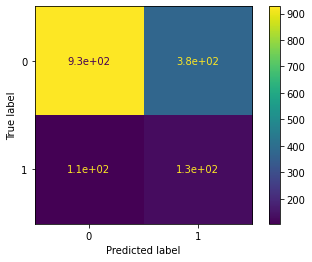

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=1, class_weight={0: 2, 1: 1}, oversample=False, kernel=poly
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.75      0.01      0.02       238

    accuracy                           0.85      1541
   macro avg       0.80      0.51      0.47      1541
weighted avg       0.83      0.85      0.78      1541



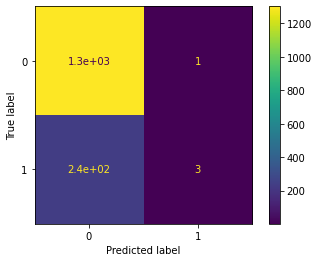

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C=1, class_weight={0: 2, 1: 1}, oversample=False, kernel=rbf
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



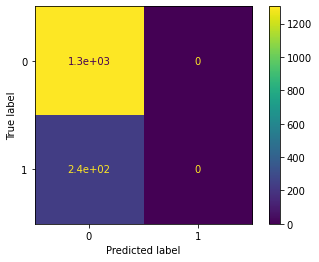

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=1, class_weight={0: 4, 1: 1}, oversample=True, kernel=linear
              precision    recall  f1-score   support

           0       0.88      0.56      0.68      1303
           1       0.20      0.60      0.30       238

    accuracy                           0.56      1541
   macro avg       0.54      0.58      0.49      1541
weighted avg       0.78      0.56      0.62      1541



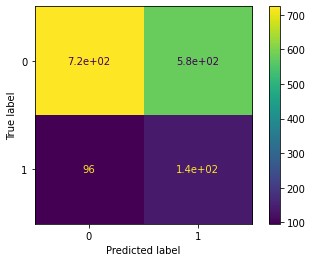

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C=1, class_weight={0: 4, 1: 1}, oversample=True, kernel=poly
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



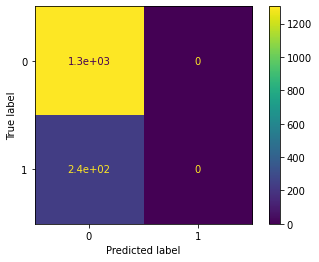

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C=1, class_weight={0: 4, 1: 1}, oversample=True, kernel=rbf
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



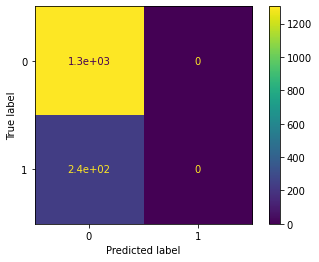

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=1, class_weight={0: 4, 1: 1}, oversample=False, kernel=linear
              precision    recall  f1-score   support

           0       0.85      0.57      0.68      1303
           1       0.16      0.44      0.23       238

    accuracy                           0.55      1541
   macro avg       0.50      0.50      0.46      1541
weighted avg       0.74      0.55      0.61      1541



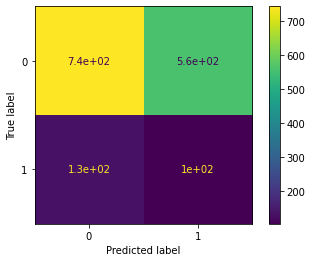

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C=1, class_weight={0: 4, 1: 1}, oversample=False, kernel=poly
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



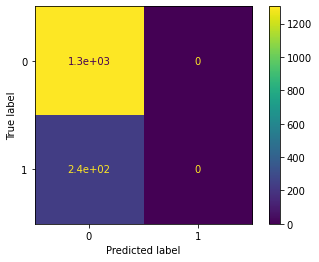

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C=1, class_weight={0: 4, 1: 1}, oversample=False, kernel=rbf
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



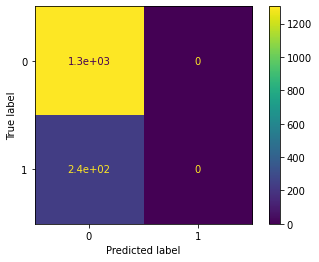

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight=None, oversample=True, kernel=linear
              precision    recall  f1-score   support

           0       0.82      0.49      0.61      1303
           1       0.13      0.42      0.20       238

    accuracy                           0.48      1541
   macro avg       0.48      0.45      0.40      1541
weighted avg       0.71      0.48      0.55      1541



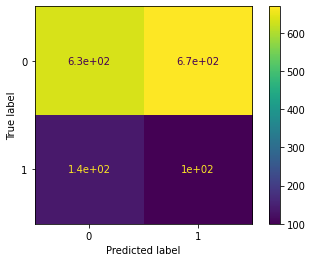

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight=None, oversample=True, kernel=poly
              precision    recall  f1-score   support

           0       0.89      0.49      0.63      1303
           1       0.20      0.68      0.31       238

    accuracy                           0.52      1541
   macro avg       0.55      0.59      0.47      1541
weighted avg       0.79      0.52      0.58      1541



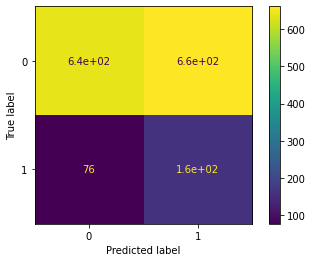

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight=None, oversample=True, kernel=rbf
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1303
           1       0.41      0.49      0.44       238

    accuracy                           0.81      1541
   macro avg       0.65      0.68      0.66      1541
weighted avg       0.83      0.81      0.82      1541



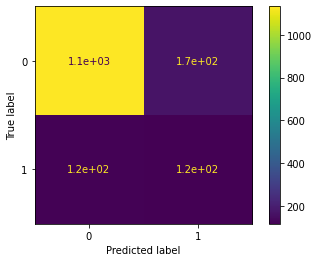

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight=None, oversample=False, kernel=linear
              precision    recall  f1-score   support

           0       0.82      0.47      0.60      1303
           1       0.14      0.45      0.21       238

    accuracy                           0.47      1541
   macro avg       0.48      0.46      0.40      1541
weighted avg       0.72      0.47      0.54      1541



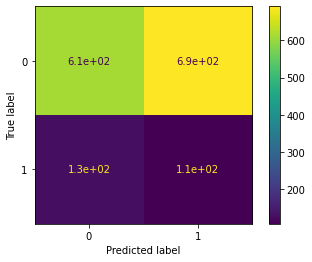

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight=None, oversample=False, kernel=poly
              precision    recall  f1-score   support

           0       0.90      0.54      0.67      1303
           1       0.21      0.66      0.32       238

    accuracy                           0.56      1541
   macro avg       0.55      0.60      0.50      1541
weighted avg       0.79      0.56      0.62      1541



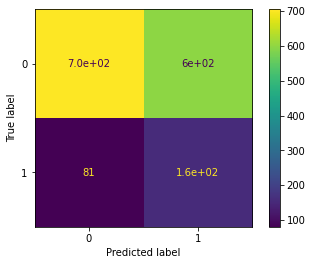

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight=None, oversample=False, kernel=rbf
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1303
           1       0.59      0.53      0.56       238

    accuracy                           0.87      1541
   macro avg       0.75      0.73      0.74      1541
weighted avg       0.87      0.87      0.87      1541



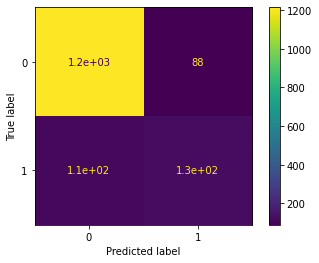

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight=balanced, oversample=True, kernel=linear
              precision    recall  f1-score   support

           0       0.82      0.49      0.61      1303
           1       0.13      0.42      0.20       238

    accuracy                           0.48      1541
   macro avg       0.48      0.45      0.40      1541
weighted avg       0.71      0.48      0.55      1541



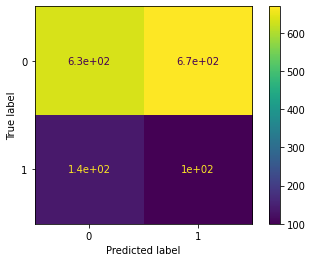

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight=balanced, oversample=True, kernel=poly
              precision    recall  f1-score   support

           0       0.89      0.49      0.63      1303
           1       0.20      0.68      0.31       238

    accuracy                           0.52      1541
   macro avg       0.55      0.59      0.47      1541
weighted avg       0.79      0.52      0.58      1541



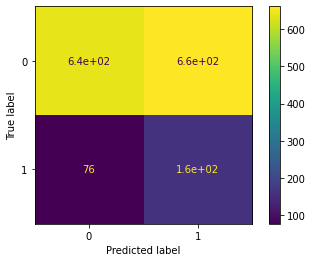

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight=balanced, oversample=True, kernel=rbf
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1303
           1       0.41      0.49      0.44       238

    accuracy                           0.81      1541
   macro avg       0.65      0.68      0.66      1541
weighted avg       0.83      0.81      0.82      1541



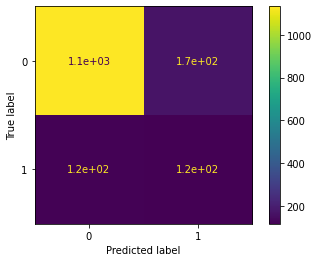

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight=balanced, oversample=False, kernel=linear
              precision    recall  f1-score   support

           0       0.85      0.43      0.57      1303
           1       0.16      0.59      0.25       238

    accuracy                           0.45      1541
   macro avg       0.51      0.51      0.41      1541
weighted avg       0.75      0.45      0.52      1541



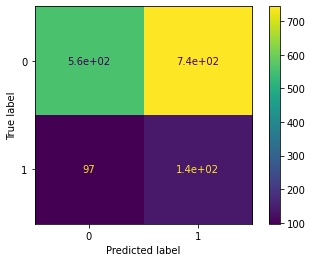

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight=balanced, oversample=False, kernel=poly
              precision    recall  f1-score   support

           0       0.86      0.29      0.43      1303
           1       0.16      0.74      0.26       238

    accuracy                           0.36      1541
   macro avg       0.51      0.51      0.35      1541
weighted avg       0.75      0.36      0.40      1541



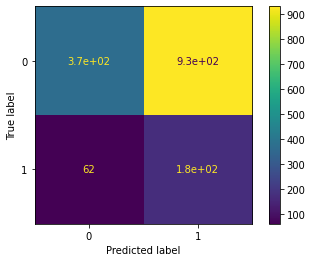

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight=balanced, oversample=False, kernel=rbf
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1303
           1       0.32      0.59      0.41       238

    accuracy                           0.74      1541
   macro avg       0.61      0.68      0.62      1541
weighted avg       0.82      0.74      0.77      1541



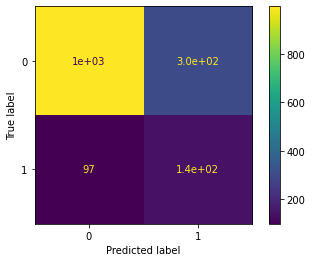

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight={0: 2, 1: 1}, oversample=True, kernel=linear
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1303
           1       0.24      0.64      0.35       238

    accuracy                           0.64      1541
   macro avg       0.58      0.64      0.55      1541
weighted avg       0.80      0.64      0.69      1541



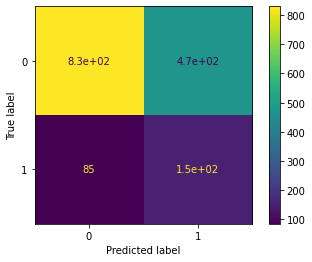

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight={0: 2, 1: 1}, oversample=True, kernel=poly
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1303
           1       0.35      0.39      0.37       238

    accuracy                           0.79      1541
   macro avg       0.62      0.63      0.62      1541
weighted avg       0.80      0.79      0.80      1541



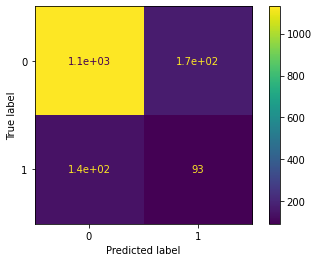

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight={0: 2, 1: 1}, oversample=True, kernel=rbf
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1303
           1       0.35      0.33      0.34       238

    accuracy                           0.80      1541
   macro avg       0.61      0.61      0.61      1541
weighted avg       0.80      0.80      0.80      1541



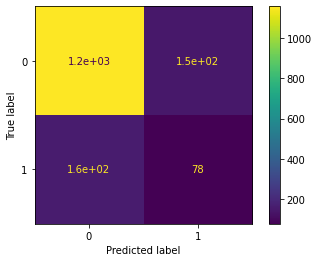

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight={0: 2, 1: 1}, oversample=False, kernel=linear
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1303
           1       0.27      0.63      0.38       238

    accuracy                           0.68      1541
   macro avg       0.59      0.66      0.58      1541
weighted avg       0.81      0.68      0.72      1541



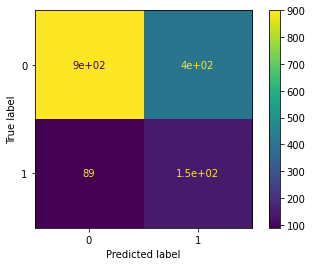

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight={0: 2, 1: 1}, oversample=False, kernel=poly
              precision    recall  f1-score   support

           0       0.87      0.68      0.76      1303
           1       0.21      0.45      0.28       238

    accuracy                           0.65      1541
   macro avg       0.54      0.57      0.52      1541
weighted avg       0.77      0.65      0.69      1541



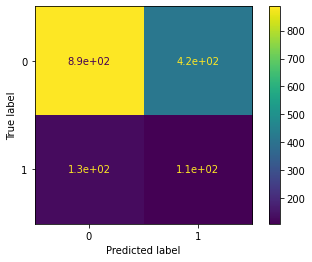

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight={0: 2, 1: 1}, oversample=False, kernel=rbf
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1303
           1       0.33      0.37      0.35       238

    accuracy                           0.78      1541
   macro avg       0.60      0.62      0.61      1541
weighted avg       0.80      0.78      0.79      1541



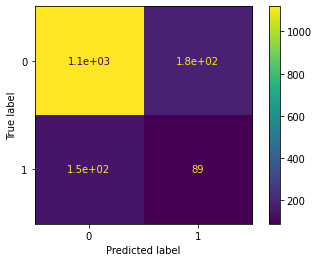

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight={0: 4, 1: 1}, oversample=True, kernel=linear
              precision    recall  f1-score   support

           0       0.87      0.64      0.74      1303
           1       0.20      0.50      0.28       238

    accuracy                           0.61      1541
   macro avg       0.54      0.57      0.51      1541
weighted avg       0.77      0.61      0.67      1541



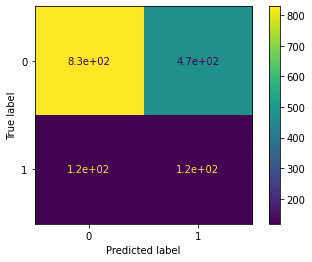

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight={0: 4, 1: 1}, oversample=True, kernel=poly
              precision    recall  f1-score   support

           0       0.88      0.80      0.83      1303
           1       0.26      0.39      0.31       238

    accuracy                           0.73      1541
   macro avg       0.57      0.60      0.57      1541
weighted avg       0.78      0.73      0.75      1541



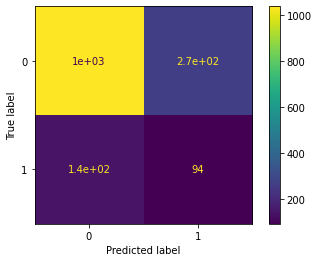

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight={0: 4, 1: 1}, oversample=True, kernel=rbf
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1303
           1       0.43      0.47      0.45       238

    accuracy                           0.82      1541
   macro avg       0.67      0.68      0.67      1541
weighted avg       0.83      0.82      0.83      1541



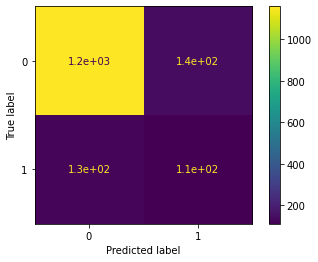

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight={0: 4, 1: 1}, oversample=False, kernel=linear
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1303
           1       0.27      0.63      0.38       238

    accuracy                           0.68      1541
   macro avg       0.59      0.66      0.58      1541
weighted avg       0.81      0.68      0.72      1541



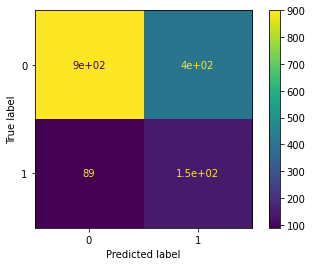

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight={0: 4, 1: 1}, oversample=False, kernel=poly
              precision    recall  f1-score   support

           0       0.86      0.46      0.60      1303
           1       0.17      0.60      0.26       238

    accuracy                           0.48      1541
   macro avg       0.51      0.53      0.43      1541
weighted avg       0.75      0.48      0.54      1541



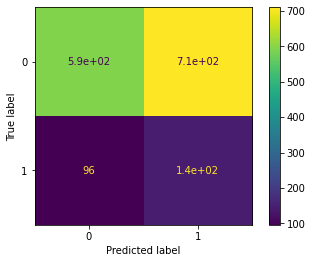

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=10, class_weight={0: 4, 1: 1}, oversample=False, kernel=rbf
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1303
           1       0.26      0.29      0.28       238

    accuracy                           0.76      1541
   macro avg       0.56      0.57      0.57      1541
weighted avg       0.77      0.76      0.77      1541



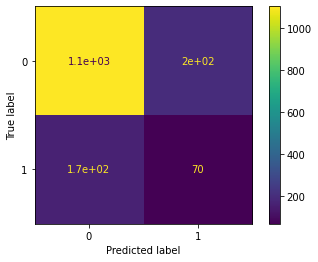

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=0.1, class_weight=None, oversample=True, kernel=linear
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1303
           1       0.48      0.34      0.40       238

    accuracy                           0.84      1541
   macro avg       0.68      0.64      0.65      1541
weighted avg       0.82      0.84      0.83      1541



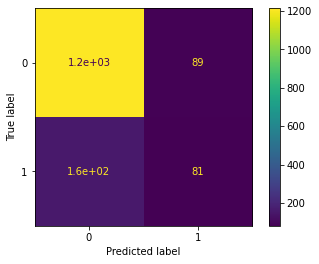

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=0.1, class_weight=None, oversample=True, kernel=poly
              precision    recall  f1-score   support

           0       1.00      0.04      0.08      1303
           1       0.16      1.00      0.28       238

    accuracy                           0.19      1541
   macro avg       0.58      0.52      0.18      1541
weighted avg       0.87      0.19      0.11      1541



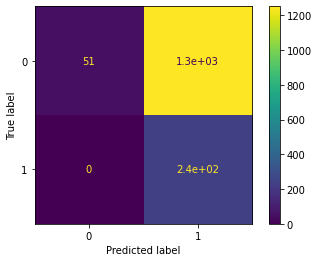

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=0.1, class_weight=None, oversample=True, kernel=rbf
              precision    recall  f1-score   support

           0       0.94      0.65      0.77      1303
           1       0.28      0.76      0.41       238

    accuracy                           0.67      1541
   macro avg       0.61      0.70      0.59      1541
weighted avg       0.84      0.67      0.71      1541



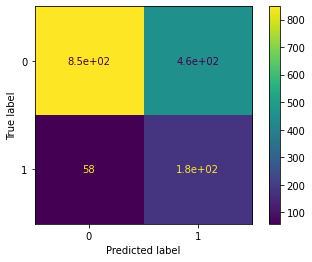

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=0.1, class_weight=None, oversample=False, kernel=linear
              precision    recall  f1-score   support

           0       0.98      0.20      0.33      1303
           1       0.18      0.98      0.31       238

    accuracy                           0.32      1541
   macro avg       0.58      0.59      0.32      1541
weighted avg       0.86      0.32      0.33      1541



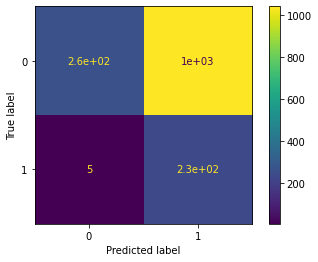

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=0.1, class_weight=None, oversample=False, kernel=poly
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1303
           1       0.15      1.00      0.27       238

    accuracy                           0.16      1541
   macro avg       0.58      0.50      0.13      1541
weighted avg       0.87      0.16      0.04      1541



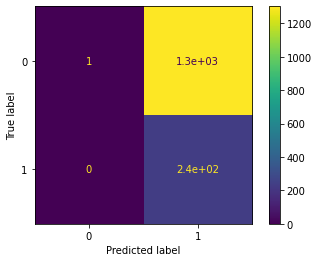

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=0.1, class_weight=None, oversample=False, kernel=rbf
              precision    recall  f1-score   support

           0       0.96      0.58      0.72      1303
           1       0.27      0.85      0.41       238

    accuracy                           0.62      1541
   macro avg       0.61      0.72      0.56      1541
weighted avg       0.85      0.62      0.67      1541



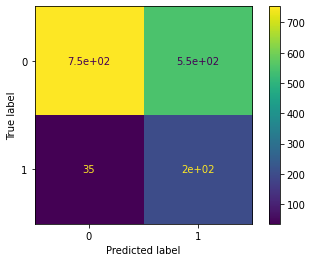

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=0.1, class_weight=balanced, oversample=True, kernel=linear
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1303
           1       0.48      0.34      0.40       238

    accuracy                           0.84      1541
   macro avg       0.68      0.64      0.65      1541
weighted avg       0.82      0.84      0.83      1541



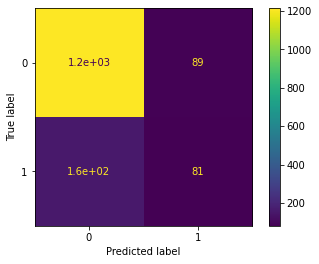

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=0.1, class_weight=balanced, oversample=True, kernel=poly
              precision    recall  f1-score   support

           0       1.00      0.04      0.08      1303
           1       0.16      1.00      0.28       238

    accuracy                           0.19      1541
   macro avg       0.58      0.52      0.18      1541
weighted avg       0.87      0.19      0.11      1541



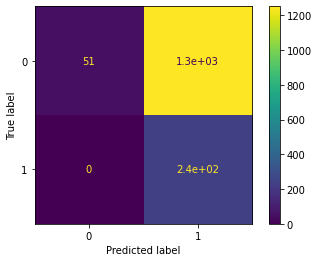

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=0.1, class_weight=balanced, oversample=True, kernel=rbf
              precision    recall  f1-score   support

           0       0.94      0.65      0.77      1303
           1       0.28      0.76      0.41       238

    accuracy                           0.67      1541
   macro avg       0.61      0.70      0.59      1541
weighted avg       0.84      0.67      0.71      1541



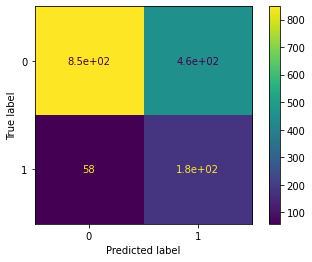

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C=0.1, class_weight=balanced, oversample=False, kernel=linear
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1303
           1       0.15      1.00      0.27       238

    accuracy                           0.15      1541
   macro avg       0.08      0.50      0.13      1541
weighted avg       0.02      0.15      0.04      1541



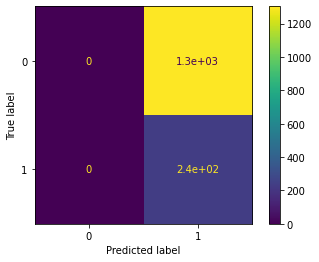

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=0.1, class_weight=balanced, oversample=False, kernel=poly
              precision    recall  f1-score   support

           0       0.98      0.06      0.12      1303
           1       0.16      0.99      0.28       238

    accuracy                           0.21      1541
   macro avg       0.57      0.53      0.20      1541
weighted avg       0.85      0.21      0.14      1541



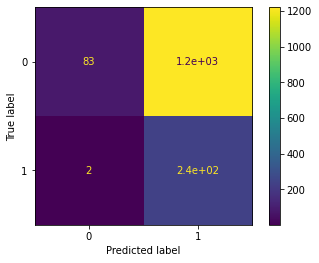

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C=0.1, class_weight=balanced, oversample=False, kernel=rbf
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1303
           1       0.15      1.00      0.27       238

    accuracy                           0.15      1541
   macro avg       0.08      0.50      0.13      1541
weighted avg       0.02      0.15      0.04      1541



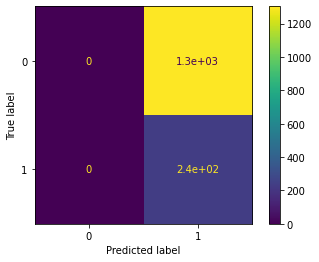

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C=0.1, class_weight={0: 2, 1: 1}, oversample=True, kernel=linear
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



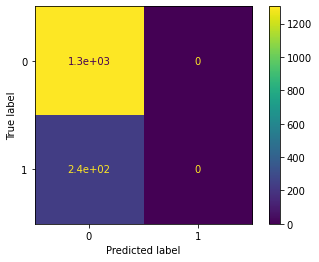

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C=0.1, class_weight={0: 2, 1: 1}, oversample=True, kernel=poly
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



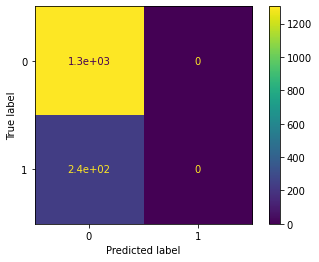

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C=0.1, class_weight={0: 2, 1: 1}, oversample=True, kernel=rbf
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



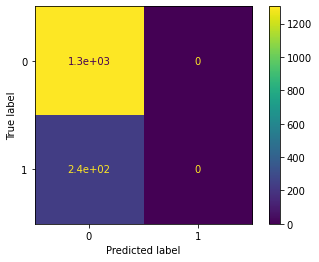

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


C=0.1, class_weight={0: 2, 1: 1}, oversample=False, kernel=linear
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       1.00      0.03      0.07       238

    accuracy                           0.85      1541
   macro avg       0.92      0.52      0.49      1541
weighted avg       0.87      0.85      0.79      1541



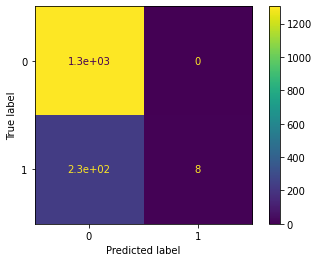

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C=0.1, class_weight={0: 2, 1: 1}, oversample=False, kernel=poly
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



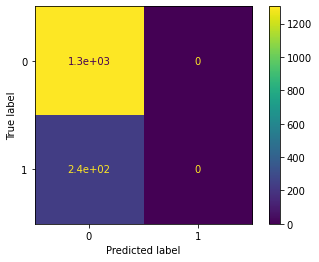

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C=0.1, class_weight={0: 2, 1: 1}, oversample=False, kernel=rbf
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



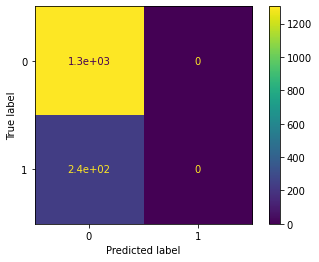

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C=0.1, class_weight={0: 4, 1: 1}, oversample=True, kernel=linear
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



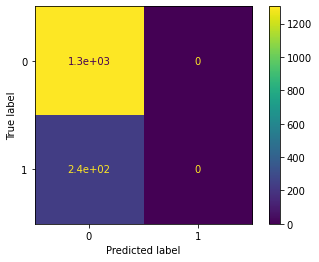

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C=0.1, class_weight={0: 4, 1: 1}, oversample=True, kernel=poly
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



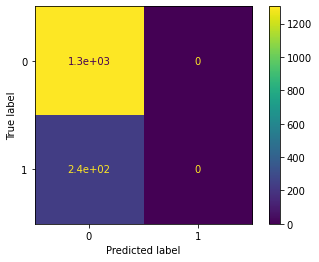

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C=0.1, class_weight={0: 4, 1: 1}, oversample=True, kernel=rbf
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



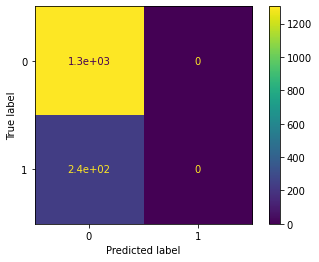

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C=0.1, class_weight={0: 4, 1: 1}, oversample=False, kernel=linear
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



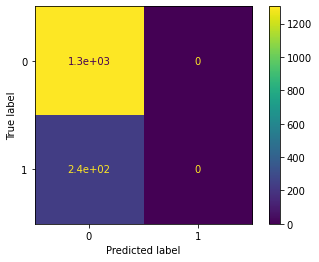

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C=0.1, class_weight={0: 4, 1: 1}, oversample=False, kernel=poly
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



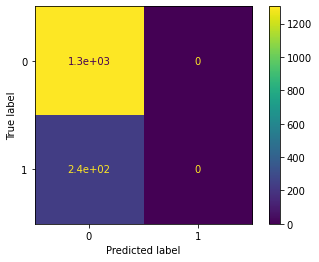

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C=0.1, class_weight={0: 4, 1: 1}, oversample=False, kernel=rbf
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



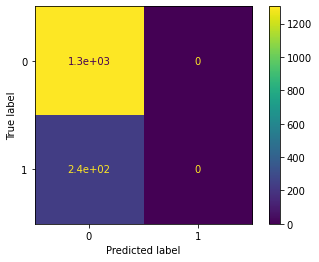

In [ ]:
# trying multiple values of hyperparameters for SVM
for C in [1, 10, 0.1]:
  for class_weight in [None, 'balanced', {0:2, 1:1}, {0:4, 1:1}]:
    for oversample in [True, False]:
      for kernel in ['linear', 'poly','rbf']:
        # creating a SVM model with default parameters
        svm = SVC(C=C, class_weight=class_weight,kernel=kernel, max_iter=500)
        # training the model
        if oversample:
          svm.fit(X_train_oversampled, y_train_oversampled)
        else:
          svm.fit(X_train, y_train)
        print(f"C={C}, class_weight={class_weight}, oversample={oversample}, kernel={kernel}")
        # evaluate on the validation set
        print(classification_report(y_val, svm.predict(X_val)))
        plot_confusion_matrix(svm, X_val, y_val)
        plt.show()

With SVM, the best F1 score on the positive class we have so far is 0.47, which is worse than logistic regression

C=0.1, class_weight=None, oversample=True, max_depth=None
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1303
           1       0.62      0.55      0.59       238

    accuracy                           0.88      1541
   macro avg       0.77      0.75      0.76      1541
weighted avg       0.87      0.88      0.88      1541



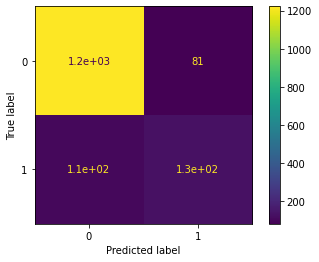

C=0.1, class_weight=None, oversample=True, max_depth=10
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1303
           1       0.47      0.78      0.59       238

    accuracy                           0.83      1541
   macro avg       0.71      0.81      0.74      1541
weighted avg       0.88      0.83      0.85      1541



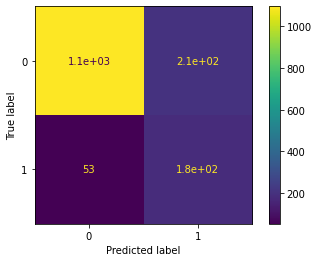

C=0.1, class_weight=None, oversample=True, max_depth=50
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1303
           1       0.64      0.52      0.57       238

    accuracy                           0.88      1541
   macro avg       0.78      0.73      0.75      1541
weighted avg       0.87      0.88      0.88      1541



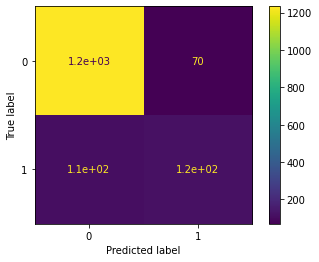

C=0.1, class_weight=None, oversample=True, max_depth=100
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1303
           1       0.64      0.58      0.61       238

    accuracy                           0.89      1541
   macro avg       0.78      0.76      0.77      1541
weighted avg       0.88      0.89      0.88      1541



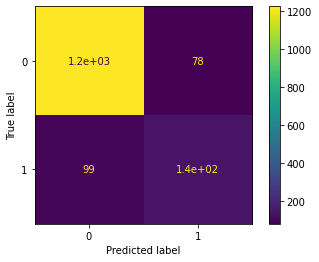

C=0.1, class_weight=None, oversample=False, max_depth=None
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1303
           1       0.73      0.43      0.54       238

    accuracy                           0.89      1541
   macro avg       0.82      0.70      0.74      1541
weighted avg       0.88      0.89      0.87      1541



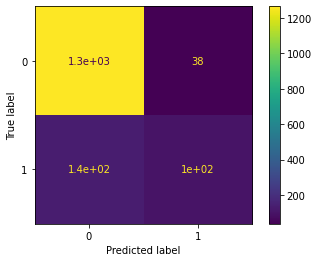

C=0.1, class_weight=None, oversample=False, max_depth=10
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1303
           1       0.77      0.37      0.50       238

    accuracy                           0.89      1541
   macro avg       0.83      0.68      0.72      1541
weighted avg       0.88      0.89      0.87      1541



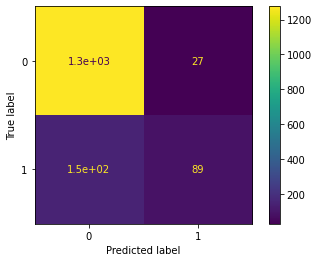

C=0.1, class_weight=None, oversample=False, max_depth=50
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1303
           1       0.73      0.40      0.51       238

    accuracy                           0.88      1541
   macro avg       0.81      0.69      0.72      1541
weighted avg       0.87      0.88      0.87      1541



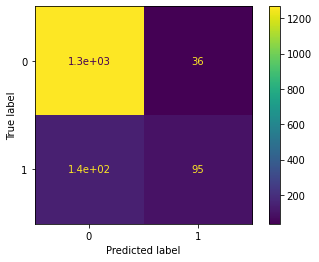

C=0.1, class_weight=None, oversample=False, max_depth=100
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1303
           1       0.72      0.41      0.52       238

    accuracy                           0.88      1541
   macro avg       0.81      0.69      0.73      1541
weighted avg       0.87      0.88      0.87      1541



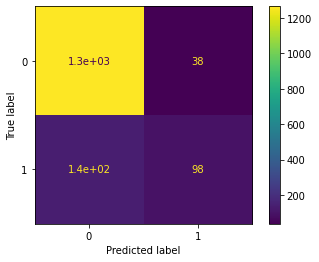

C=0.1, class_weight=balanced, oversample=True, max_depth=None
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1303
           1       0.63      0.58      0.61       238

    accuracy                           0.88      1541
   macro avg       0.78      0.76      0.77      1541
weighted avg       0.88      0.88      0.88      1541



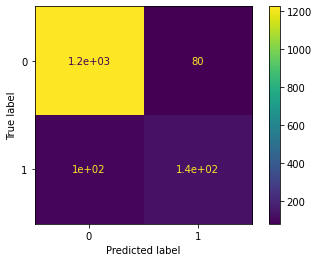

C=0.1, class_weight=balanced, oversample=True, max_depth=10
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1303
           1       0.51      0.74      0.60       238

    accuracy                           0.85      1541
   macro avg       0.73      0.80      0.76      1541
weighted avg       0.88      0.85      0.86      1541



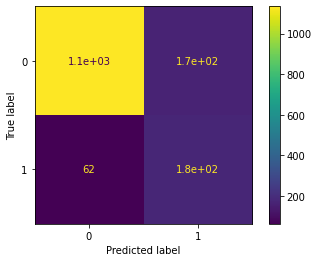

C=0.1, class_weight=balanced, oversample=True, max_depth=50
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1303
           1       0.66      0.48      0.55       238

    accuracy                           0.88      1541
   macro avg       0.78      0.72      0.74      1541
weighted avg       0.87      0.88      0.87      1541



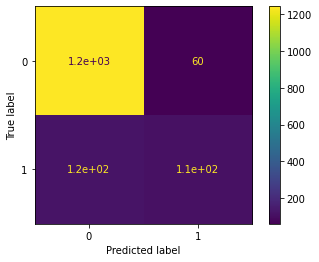

C=0.1, class_weight=balanced, oversample=True, max_depth=100
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1303
           1       0.62      0.54      0.57       238

    accuracy                           0.88      1541
   macro avg       0.77      0.74      0.75      1541
weighted avg       0.87      0.88      0.87      1541



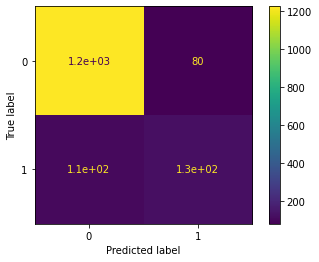

C=0.1, class_weight=balanced, oversample=False, max_depth=None
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1303
           1       0.69      0.40      0.51       238

    accuracy                           0.88      1541
   macro avg       0.79      0.68      0.72      1541
weighted avg       0.87      0.88      0.87      1541



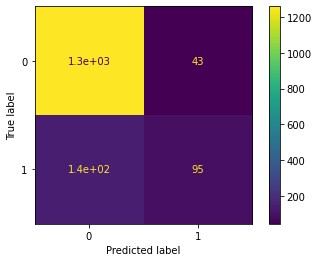

C=0.1, class_weight=balanced, oversample=False, max_depth=10
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1303
           1       0.53      0.71      0.61       238

    accuracy                           0.86      1541
   macro avg       0.74      0.80      0.76      1541
weighted avg       0.88      0.86      0.87      1541



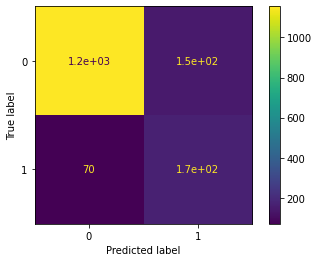

C=0.1, class_weight=balanced, oversample=False, max_depth=50
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1303
           1       0.73      0.42      0.53       238

    accuracy                           0.89      1541
   macro avg       0.82      0.69      0.73      1541
weighted avg       0.88      0.89      0.87      1541



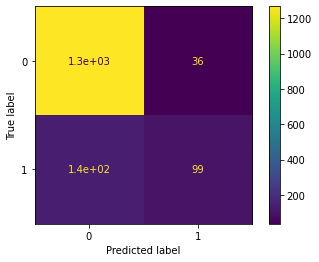

C=0.1, class_weight=balanced, oversample=False, max_depth=100
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1303
           1       0.71      0.42      0.53       238

    accuracy                           0.88      1541
   macro avg       0.81      0.69      0.73      1541
weighted avg       0.87      0.88      0.87      1541



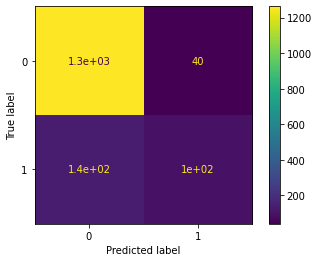

C=0.1, class_weight={0: 2, 1: 1}, oversample=True, max_depth=None
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1303
           1       0.64      0.51      0.57       238

    accuracy                           0.88      1541
   macro avg       0.78      0.73      0.75      1541
weighted avg       0.87      0.88      0.87      1541



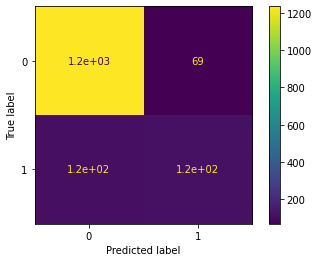

C=0.1, class_weight={0: 2, 1: 1}, oversample=True, max_depth=10
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1303
           1       0.58      0.57      0.58       238

    accuracy                           0.87      1541
   macro avg       0.75      0.75      0.75      1541
weighted avg       0.87      0.87      0.87      1541



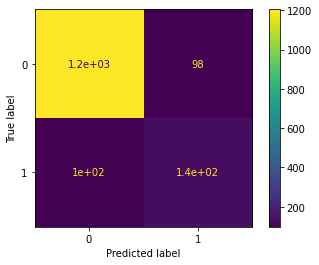

C=0.1, class_weight={0: 2, 1: 1}, oversample=True, max_depth=50
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1303
           1       0.65      0.51      0.57       238

    accuracy                           0.88      1541
   macro avg       0.78      0.73      0.75      1541
weighted avg       0.87      0.88      0.88      1541



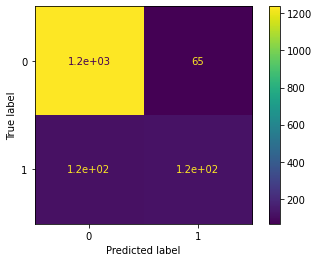

C=0.1, class_weight={0: 2, 1: 1}, oversample=True, max_depth=100
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1303
           1       0.65      0.50      0.57       238

    accuracy                           0.88      1541
   macro avg       0.78      0.73      0.75      1541
weighted avg       0.87      0.88      0.87      1541



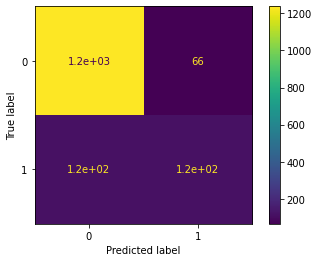

C=0.1, class_weight={0: 2, 1: 1}, oversample=False, max_depth=None
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1303
           1       0.68      0.39      0.50       238

    accuracy                           0.88      1541
   macro avg       0.79      0.68      0.71      1541
weighted avg       0.86      0.88      0.86      1541



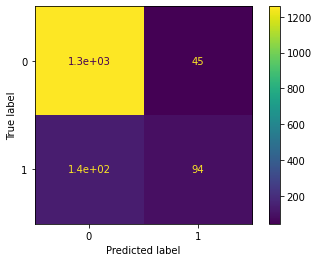

C=0.1, class_weight={0: 2, 1: 1}, oversample=False, max_depth=10
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1303
           1       0.82      0.26      0.39       238

    accuracy                           0.88      1541
   macro avg       0.85      0.62      0.66      1541
weighted avg       0.87      0.88      0.85      1541



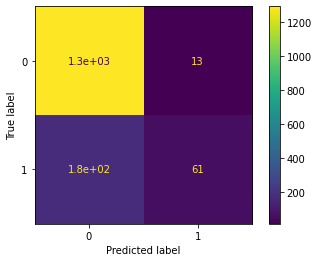

C=0.1, class_weight={0: 2, 1: 1}, oversample=False, max_depth=50
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1303
           1       0.72      0.42      0.53       238

    accuracy                           0.89      1541
   macro avg       0.81      0.70      0.73      1541
weighted avg       0.87      0.89      0.87      1541



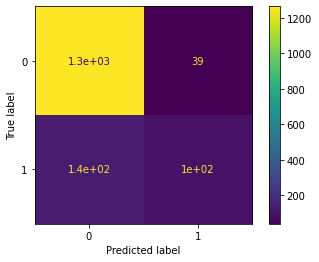

C=0.1, class_weight={0: 2, 1: 1}, oversample=False, max_depth=100
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1303
           1       0.70      0.43      0.53       238

    accuracy                           0.88      1541
   macro avg       0.80      0.70      0.73      1541
weighted avg       0.87      0.88      0.87      1541



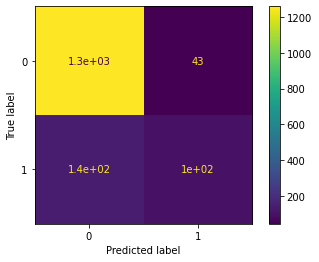

C=0.1, class_weight={0: 4, 1: 1}, oversample=True, max_depth=None
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1303
           1       0.66      0.55      0.60       238

    accuracy                           0.89      1541
   macro avg       0.79      0.75      0.77      1541
weighted avg       0.88      0.89      0.88      1541



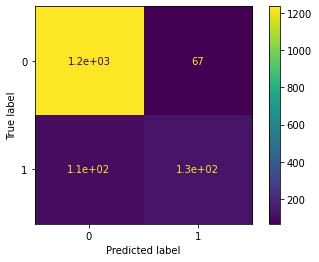

C=0.1, class_weight={0: 4, 1: 1}, oversample=True, max_depth=10
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1303
           1       0.73      0.53      0.61       238

    accuracy                           0.90      1541
   macro avg       0.82      0.75      0.78      1541
weighted avg       0.89      0.90      0.89      1541



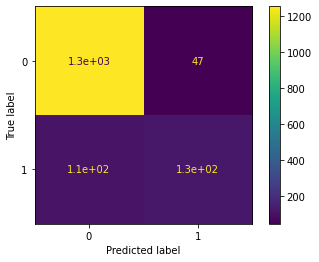

C=0.1, class_weight={0: 4, 1: 1}, oversample=True, max_depth=50
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1303
           1       0.63      0.53      0.58       238

    accuracy                           0.88      1541
   macro avg       0.77      0.74      0.75      1541
weighted avg       0.87      0.88      0.87      1541



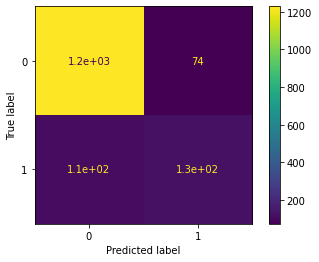

C=0.1, class_weight={0: 4, 1: 1}, oversample=True, max_depth=100
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1303
           1       0.65      0.53      0.59       238

    accuracy                           0.88      1541
   macro avg       0.79      0.74      0.76      1541
weighted avg       0.88      0.88      0.88      1541



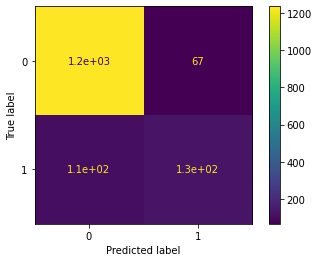

C=0.1, class_weight={0: 4, 1: 1}, oversample=False, max_depth=None
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1303
           1       0.75      0.44      0.55       238

    accuracy                           0.89      1541
   macro avg       0.83      0.71      0.74      1541
weighted avg       0.88      0.89      0.88      1541



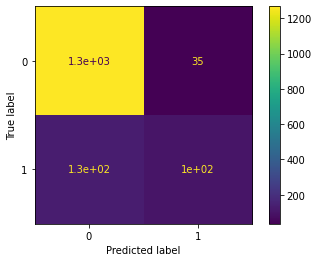

C=0.1, class_weight={0: 4, 1: 1}, oversample=False, max_depth=10
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1303
           1       0.93      0.16      0.27       238

    accuracy                           0.87      1541
   macro avg       0.90      0.58      0.60      1541
weighted avg       0.88      0.87      0.83      1541



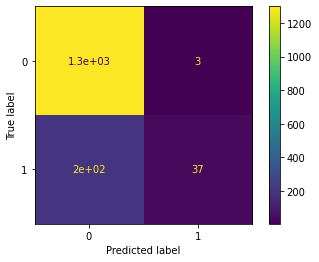

C=0.1, class_weight={0: 4, 1: 1}, oversample=False, max_depth=50
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1303
           1       0.66      0.42      0.51       238

    accuracy                           0.88      1541
   macro avg       0.78      0.69      0.72      1541
weighted avg       0.86      0.88      0.86      1541



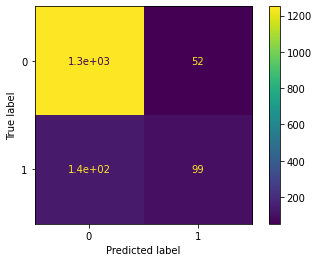

C=0.1, class_weight={0: 4, 1: 1}, oversample=False, max_depth=100
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1303
           1       0.69      0.44      0.54       238

    accuracy                           0.88      1541
   macro avg       0.80      0.70      0.73      1541
weighted avg       0.87      0.88      0.87      1541



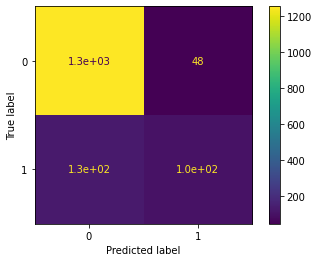

C=0.1, class_weight=None, oversample=True, max_depth=None
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1303
           1       0.65      0.59      0.62       238

    accuracy                           0.89      1541
   macro avg       0.79      0.76      0.78      1541
weighted avg       0.88      0.89      0.88      1541



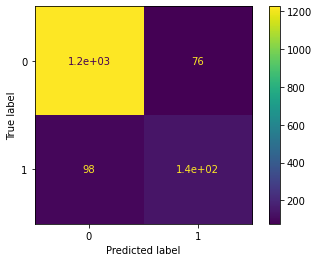

C=0.1, class_weight=None, oversample=True, max_depth=10
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1303
           1       0.54      0.78      0.64       238

    accuracy                           0.86      1541
   macro avg       0.75      0.83      0.78      1541
weighted avg       0.89      0.86      0.87      1541



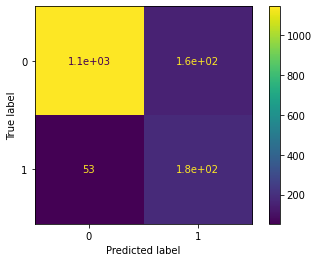

C=0.1, class_weight=None, oversample=True, max_depth=50
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1303
           1       0.65      0.58      0.62       238

    accuracy                           0.89      1541
   macro avg       0.79      0.76      0.77      1541
weighted avg       0.88      0.89      0.88      1541



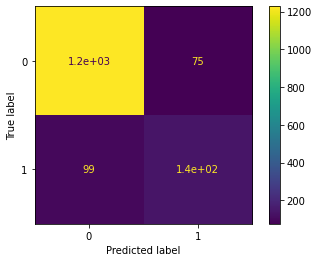

C=0.1, class_weight=None, oversample=True, max_depth=100
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1303
           1       0.64      0.60      0.62       238

    accuracy                           0.89      1541
   macro avg       0.78      0.77      0.78      1541
weighted avg       0.88      0.89      0.88      1541



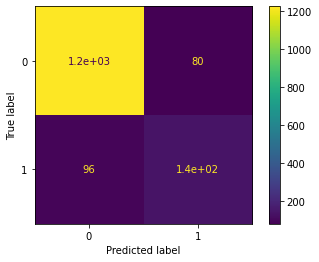

C=0.1, class_weight=None, oversample=False, max_depth=None
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1303
           1       0.71      0.48      0.57       238

    accuracy                           0.89      1541
   macro avg       0.81      0.72      0.75      1541
weighted avg       0.88      0.89      0.88      1541



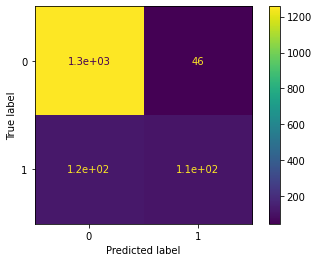

C=0.1, class_weight=None, oversample=False, max_depth=10
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1303
           1       0.78      0.42      0.55       238

    accuracy                           0.89      1541
   macro avg       0.84      0.70      0.74      1541
weighted avg       0.88      0.89      0.88      1541



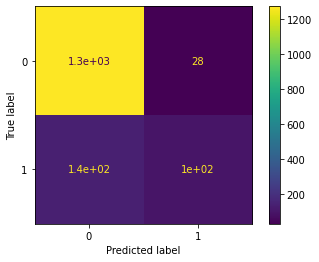

C=0.1, class_weight=None, oversample=False, max_depth=50
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1303
           1       0.74      0.51      0.61       238

    accuracy                           0.90      1541
   macro avg       0.83      0.74      0.77      1541
weighted avg       0.89      0.90      0.89      1541



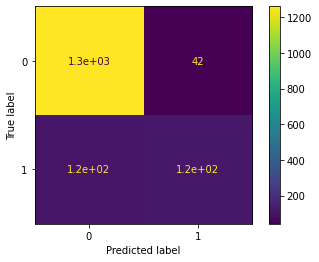

C=0.1, class_weight=None, oversample=False, max_depth=100
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1303
           1       0.70      0.49      0.58       238

    accuracy                           0.89      1541
   macro avg       0.81      0.73      0.76      1541
weighted avg       0.88      0.89      0.88      1541



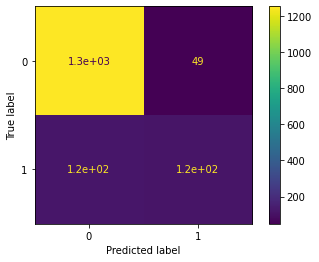

C=0.1, class_weight=balanced, oversample=True, max_depth=None
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1303
           1       0.67      0.61      0.63       238

    accuracy                           0.89      1541
   macro avg       0.80      0.77      0.79      1541
weighted avg       0.89      0.89      0.89      1541



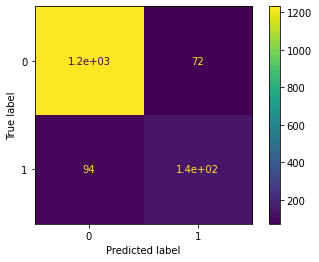

C=0.1, class_weight=balanced, oversample=True, max_depth=10
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1303
           1       0.53      0.78      0.63       238

    accuracy                           0.86      1541
   macro avg       0.74      0.83      0.77      1541
weighted avg       0.89      0.86      0.87      1541



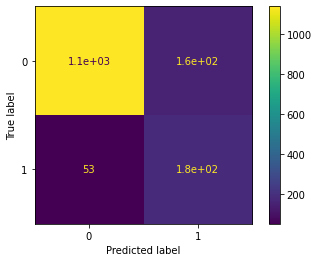

C=0.1, class_weight=balanced, oversample=True, max_depth=50
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1303
           1       0.65      0.56      0.60       238

    accuracy                           0.89      1541
   macro avg       0.78      0.75      0.77      1541
weighted avg       0.88      0.89      0.88      1541



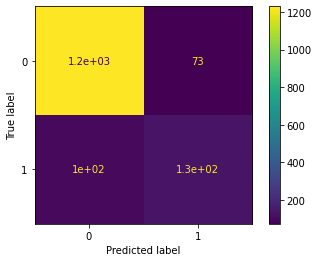

C=0.1, class_weight=balanced, oversample=True, max_depth=100
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1303
           1       0.65      0.59      0.62       238

    accuracy                           0.89      1541
   macro avg       0.79      0.77      0.78      1541
weighted avg       0.88      0.89      0.89      1541



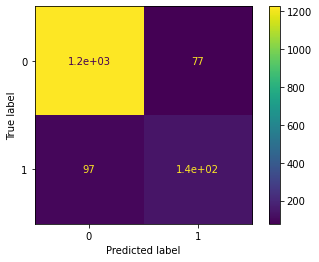

C=0.1, class_weight=balanced, oversample=False, max_depth=None
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1303
           1       0.71      0.46      0.56       238

    accuracy                           0.89      1541
   macro avg       0.81      0.71      0.75      1541
weighted avg       0.88      0.89      0.88      1541



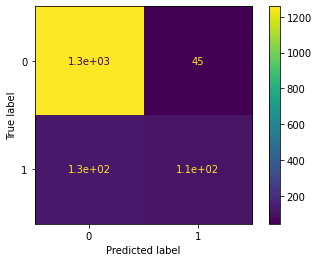

C=0.1, class_weight=balanced, oversample=False, max_depth=10
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1303
           1       0.56      0.76      0.65       238

    accuracy                           0.87      1541
   macro avg       0.76      0.82      0.78      1541
weighted avg       0.89      0.87      0.88      1541



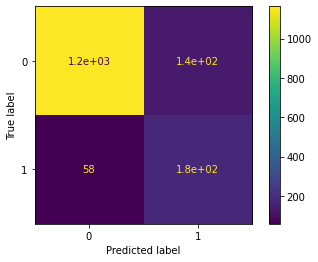

C=0.1, class_weight=balanced, oversample=False, max_depth=50
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1303
           1       0.72      0.49      0.58       238

    accuracy                           0.89      1541
   macro avg       0.81      0.73      0.76      1541
weighted avg       0.88      0.89      0.88      1541



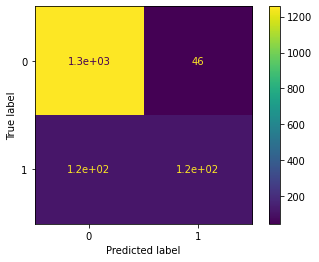

C=0.1, class_weight=balanced, oversample=False, max_depth=100
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1303
           1       0.71      0.46      0.56       238

    accuracy                           0.89      1541
   macro avg       0.81      0.71      0.75      1541
weighted avg       0.88      0.89      0.88      1541



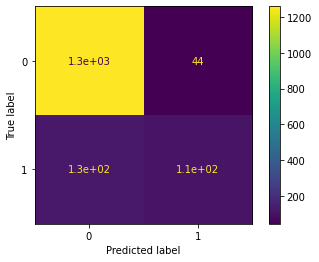

C=0.1, class_weight={0: 2, 1: 1}, oversample=True, max_depth=None
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1303
           1       0.65      0.59      0.62       238

    accuracy                           0.89      1541
   macro avg       0.79      0.77      0.78      1541
weighted avg       0.88      0.89      0.89      1541



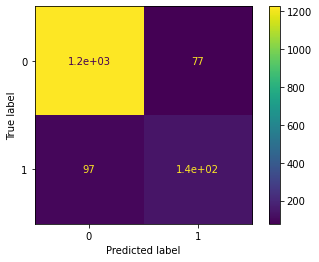

C=0.1, class_weight={0: 2, 1: 1}, oversample=True, max_depth=10
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1303
           1       0.60      0.67      0.64       238

    accuracy                           0.88      1541
   macro avg       0.77      0.80      0.78      1541
weighted avg       0.89      0.88      0.88      1541



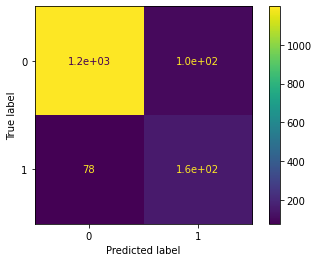

C=0.1, class_weight={0: 2, 1: 1}, oversample=True, max_depth=50
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1303
           1       0.66      0.61      0.63       238

    accuracy                           0.89      1541
   macro avg       0.79      0.78      0.78      1541
weighted avg       0.89      0.89      0.89      1541



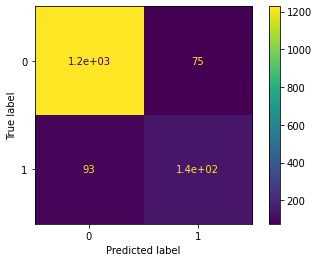

C=0.1, class_weight={0: 2, 1: 1}, oversample=True, max_depth=100
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1303
           1       0.65      0.61      0.63       238

    accuracy                           0.89      1541
   macro avg       0.79      0.77      0.78      1541
weighted avg       0.89      0.89      0.89      1541



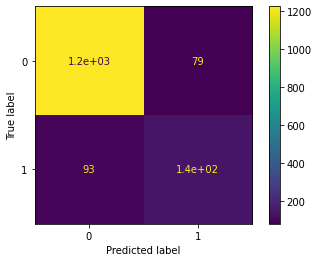

C=0.1, class_weight={0: 2, 1: 1}, oversample=False, max_depth=None
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1303
           1       0.68      0.47      0.56       238

    accuracy                           0.88      1541
   macro avg       0.80      0.72      0.75      1541
weighted avg       0.87      0.88      0.88      1541



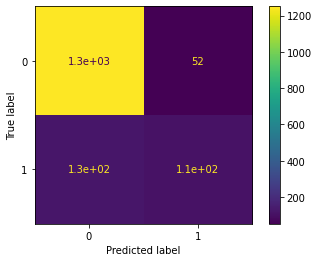

C=0.1, class_weight={0: 2, 1: 1}, oversample=False, max_depth=10
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1303
           1       0.89      0.27      0.41       238

    accuracy                           0.88      1541
   macro avg       0.89      0.63      0.67      1541
weighted avg       0.88      0.88      0.85      1541



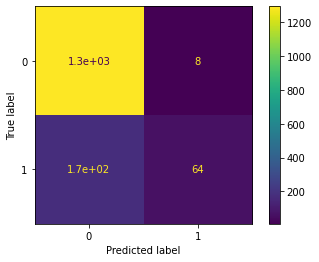

C=0.1, class_weight={0: 2, 1: 1}, oversample=False, max_depth=50
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1303
           1       0.73      0.48      0.58       238

    accuracy                           0.89      1541
   macro avg       0.82      0.72      0.76      1541
weighted avg       0.88      0.89      0.88      1541



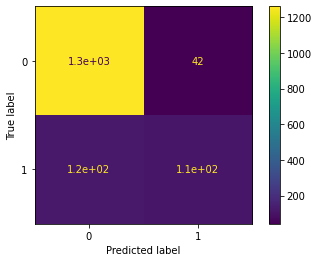

C=0.1, class_weight={0: 2, 1: 1}, oversample=False, max_depth=100
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1303
           1       0.72      0.49      0.58       238

    accuracy                           0.89      1541
   macro avg       0.81      0.73      0.76      1541
weighted avg       0.88      0.89      0.88      1541



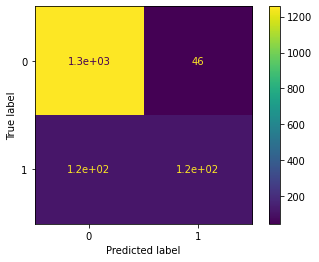

C=0.1, class_weight={0: 4, 1: 1}, oversample=True, max_depth=None
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1303
           1       0.63      0.58      0.60       238

    accuracy                           0.88      1541
   macro avg       0.77      0.76      0.76      1541
weighted avg       0.88      0.88      0.88      1541



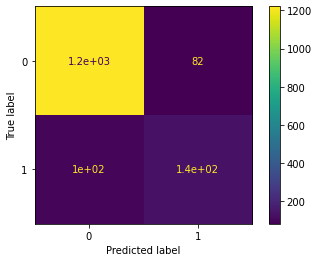

C=0.1, class_weight={0: 4, 1: 1}, oversample=True, max_depth=10
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1303
           1       0.72      0.54      0.62       238

    accuracy                           0.90      1541
   macro avg       0.82      0.75      0.78      1541
weighted avg       0.89      0.90      0.89      1541



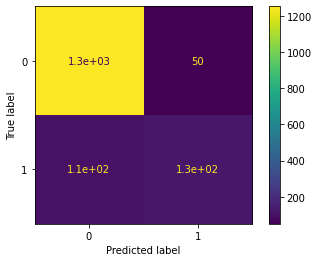

C=0.1, class_weight={0: 4, 1: 1}, oversample=True, max_depth=50
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1303
           1       0.65      0.62      0.63       238

    accuracy                           0.89      1541
   macro avg       0.79      0.78      0.78      1541
weighted avg       0.89      0.89      0.89      1541



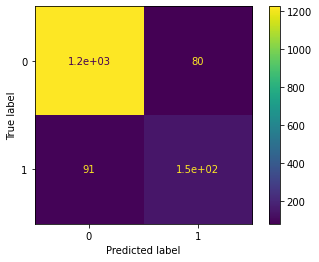

C=0.1, class_weight={0: 4, 1: 1}, oversample=True, max_depth=100
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1303
           1       0.65      0.61      0.63       238

    accuracy                           0.89      1541
   macro avg       0.79      0.77      0.78      1541
weighted avg       0.89      0.89      0.89      1541



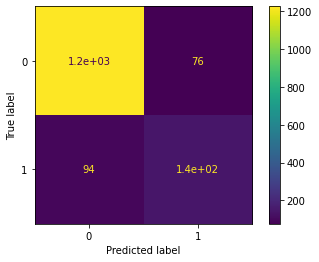

C=0.1, class_weight={0: 4, 1: 1}, oversample=False, max_depth=None
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1303
           1       0.71      0.49      0.58       238

    accuracy                           0.89      1541
   macro avg       0.81      0.73      0.76      1541
weighted avg       0.88      0.89      0.88      1541



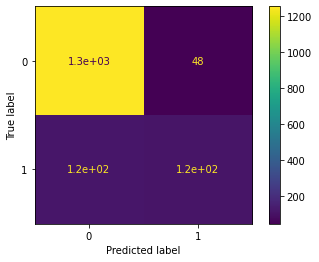

C=0.1, class_weight={0: 4, 1: 1}, oversample=False, max_depth=10
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1303
           1       0.97      0.14      0.25       238

    accuracy                           0.87      1541
   macro avg       0.92      0.57      0.59      1541
weighted avg       0.88      0.87      0.82      1541



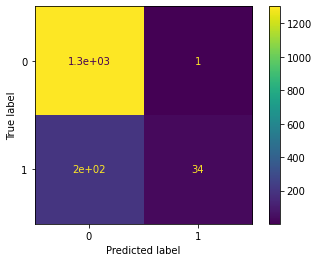

C=0.1, class_weight={0: 4, 1: 1}, oversample=False, max_depth=50
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1303
           1       0.73      0.50      0.59       238

    accuracy                           0.89      1541
   macro avg       0.82      0.73      0.77      1541
weighted avg       0.88      0.89      0.89      1541



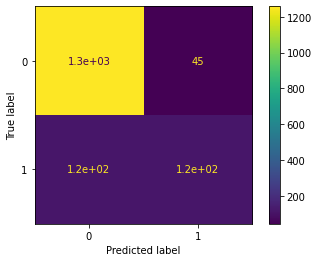

C=0.1, class_weight={0: 4, 1: 1}, oversample=False, max_depth=100
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1303
           1       0.70      0.47      0.56       238

    accuracy                           0.89      1541
   macro avg       0.81      0.72      0.75      1541
weighted avg       0.88      0.89      0.88      1541



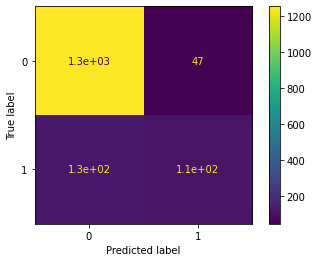

C=0.1, class_weight=None, oversample=True, max_depth=None
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1303
           1       0.66      0.62      0.64       238

    accuracy                           0.89      1541
   macro avg       0.80      0.78      0.79      1541
weighted avg       0.89      0.89      0.89      1541



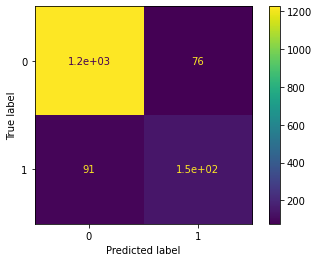

C=0.1, class_weight=None, oversample=True, max_depth=10
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1303
           1       0.53      0.77      0.63       238

    accuracy                           0.86      1541
   macro avg       0.74      0.82      0.77      1541
weighted avg       0.89      0.86      0.87      1541



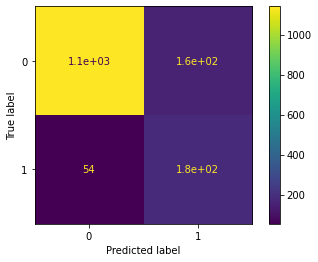

C=0.1, class_weight=None, oversample=True, max_depth=50
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1303
           1       0.64      0.59      0.62       238

    accuracy                           0.89      1541
   macro avg       0.79      0.77      0.78      1541
weighted avg       0.88      0.89      0.88      1541



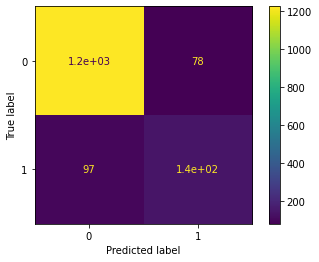

C=0.1, class_weight=None, oversample=True, max_depth=100
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1303
           1       0.65      0.59      0.62       238

    accuracy                           0.89      1541
   macro avg       0.79      0.77      0.78      1541
weighted avg       0.88      0.89      0.89      1541



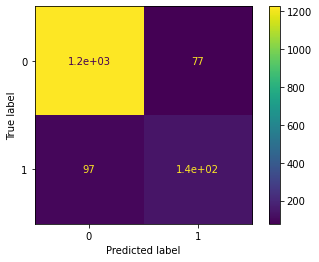

C=0.1, class_weight=None, oversample=False, max_depth=None
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1303
           1       0.73      0.47      0.57       238

    accuracy                           0.89      1541
   macro avg       0.82      0.72      0.75      1541
weighted avg       0.88      0.89      0.88      1541



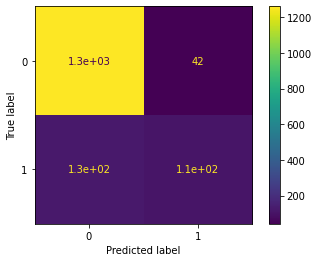

C=0.1, class_weight=None, oversample=False, max_depth=10
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1303
           1       0.76      0.42      0.54       238

    accuracy                           0.89      1541
   macro avg       0.83      0.70      0.74      1541
weighted avg       0.88      0.89      0.88      1541



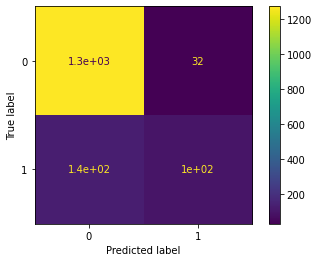

C=0.1, class_weight=None, oversample=False, max_depth=50
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1303
           1       0.70      0.51      0.59       238

    accuracy                           0.89      1541
   macro avg       0.81      0.73      0.76      1541
weighted avg       0.88      0.89      0.88      1541



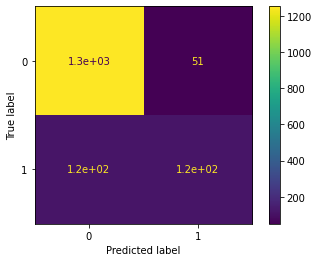

C=0.1, class_weight=None, oversample=False, max_depth=100
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1303
           1       0.73      0.47      0.57       238

    accuracy                           0.89      1541
   macro avg       0.82      0.72      0.75      1541
weighted avg       0.88      0.89      0.88      1541



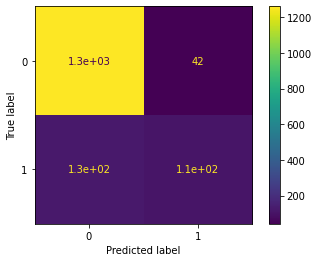

C=0.1, class_weight=balanced, oversample=True, max_depth=None
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1303
           1       0.64      0.61      0.63       238

    accuracy                           0.89      1541
   macro avg       0.79      0.78      0.78      1541
weighted avg       0.89      0.89      0.89      1541



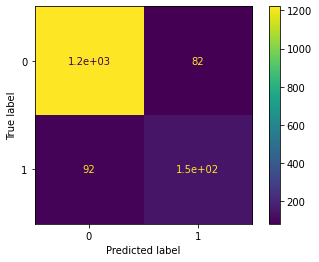

C=0.1, class_weight=balanced, oversample=True, max_depth=10
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1303
           1       0.53      0.78      0.63       238

    accuracy                           0.86      1541
   macro avg       0.74      0.82      0.77      1541
weighted avg       0.89      0.86      0.87      1541



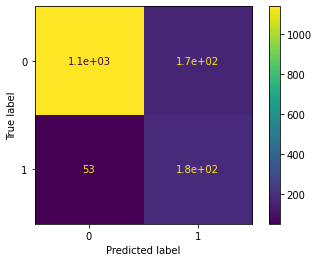

C=0.1, class_weight=balanced, oversample=True, max_depth=50
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1303
           1       0.65      0.61      0.63       238

    accuracy                           0.89      1541
   macro avg       0.79      0.78      0.78      1541
weighted avg       0.89      0.89      0.89      1541



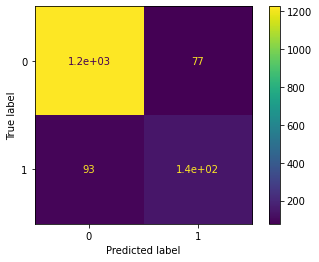

C=0.1, class_weight=balanced, oversample=True, max_depth=100
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1303
           1       0.65      0.61      0.63       238

    accuracy                           0.89      1541
   macro avg       0.79      0.77      0.78      1541
weighted avg       0.89      0.89      0.89      1541



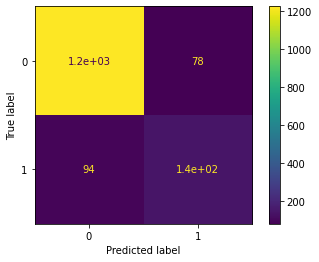

C=0.1, class_weight=balanced, oversample=False, max_depth=None
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1303
           1       0.71      0.48      0.57       238

    accuracy                           0.89      1541
   macro avg       0.81      0.72      0.75      1541
weighted avg       0.88      0.89      0.88      1541



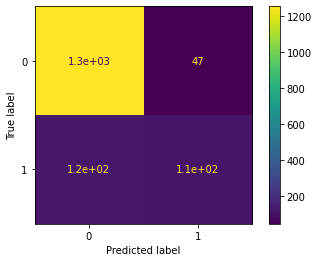

C=0.1, class_weight=balanced, oversample=False, max_depth=10
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1303
           1       0.56      0.74      0.64       238

    accuracy                           0.87      1541
   macro avg       0.75      0.82      0.78      1541
weighted avg       0.89      0.87      0.88      1541



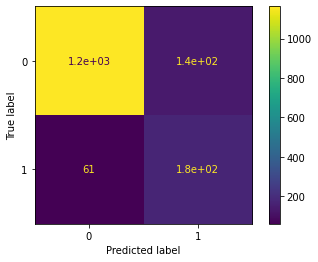

C=0.1, class_weight=balanced, oversample=False, max_depth=50
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1303
           1       0.71      0.47      0.56       238

    accuracy                           0.89      1541
   macro avg       0.81      0.72      0.75      1541
weighted avg       0.88      0.89      0.88      1541



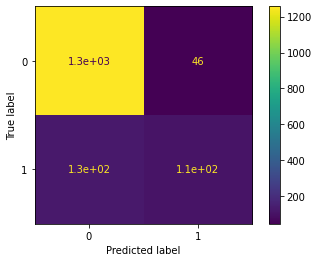

C=0.1, class_weight=balanced, oversample=False, max_depth=100
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1303
           1       0.74      0.48      0.58       238

    accuracy                           0.89      1541
   macro avg       0.82      0.73      0.76      1541
weighted avg       0.88      0.89      0.88      1541



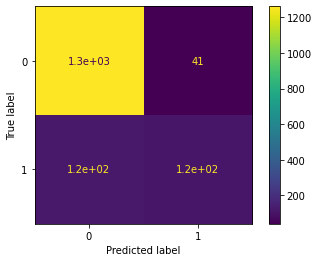

C=0.1, class_weight={0: 2, 1: 1}, oversample=True, max_depth=None
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1303
           1       0.66      0.61      0.63       238

    accuracy                           0.89      1541
   macro avg       0.79      0.78      0.78      1541
weighted avg       0.89      0.89      0.89      1541



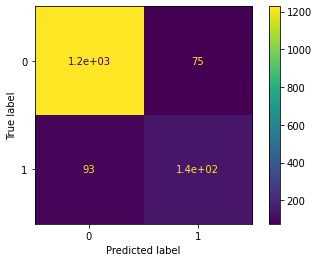

C=0.1, class_weight={0: 2, 1: 1}, oversample=True, max_depth=10
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1303
           1       0.59      0.69      0.64       238

    accuracy                           0.88      1541
   macro avg       0.77      0.80      0.78      1541
weighted avg       0.89      0.88      0.88      1541



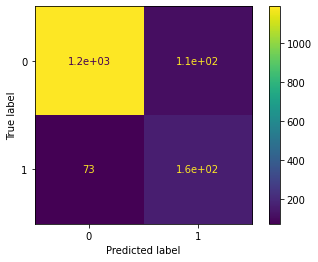

C=0.1, class_weight={0: 2, 1: 1}, oversample=True, max_depth=50
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1303
           1       0.65      0.61      0.63       238

    accuracy                           0.89      1541
   macro avg       0.79      0.78      0.78      1541
weighted avg       0.89      0.89      0.89      1541



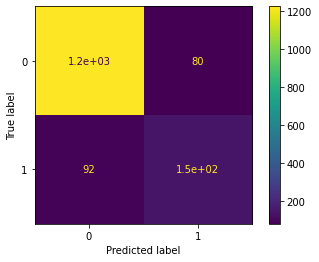

C=0.1, class_weight={0: 2, 1: 1}, oversample=True, max_depth=100
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1303
           1       0.65      0.61      0.63       238

    accuracy                           0.89      1541
   macro avg       0.79      0.78      0.78      1541
weighted avg       0.89      0.89      0.89      1541



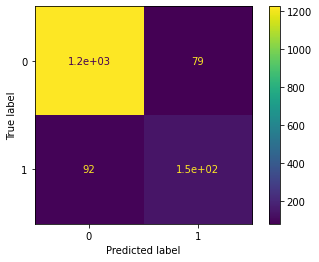

C=0.1, class_weight={0: 2, 1: 1}, oversample=False, max_depth=None
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1303
           1       0.72      0.49      0.58       238

    accuracy                           0.89      1541
   macro avg       0.81      0.73      0.76      1541
weighted avg       0.88      0.89      0.88      1541



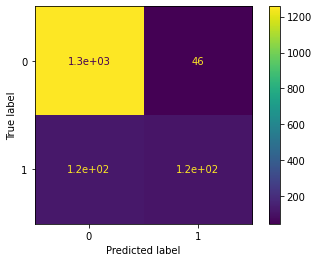

C=0.1, class_weight={0: 2, 1: 1}, oversample=False, max_depth=10
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1303
           1       0.86      0.26      0.39       238

    accuracy                           0.88      1541
   macro avg       0.87      0.62      0.66      1541
weighted avg       0.88      0.88      0.85      1541



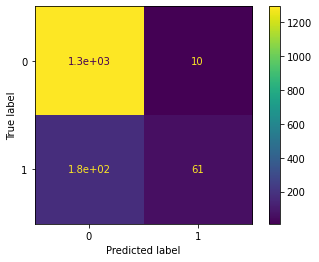

C=0.1, class_weight={0: 2, 1: 1}, oversample=False, max_depth=50
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1303
           1       0.71      0.48      0.57       238

    accuracy                           0.89      1541
   macro avg       0.81      0.72      0.76      1541
weighted avg       0.88      0.89      0.88      1541



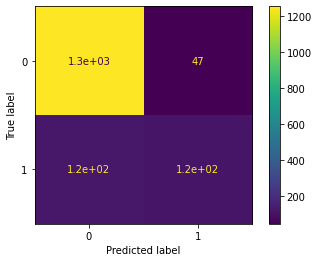

C=0.1, class_weight={0: 2, 1: 1}, oversample=False, max_depth=100
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1303
           1       0.74      0.52      0.61       238

    accuracy                           0.90      1541
   macro avg       0.83      0.74      0.78      1541
weighted avg       0.89      0.90      0.89      1541



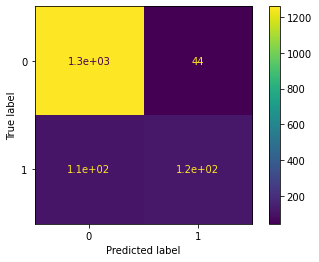

C=0.1, class_weight={0: 4, 1: 1}, oversample=True, max_depth=None
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1303
           1       0.64      0.62      0.63       238

    accuracy                           0.89      1541
   macro avg       0.78      0.78      0.78      1541
weighted avg       0.89      0.89      0.89      1541



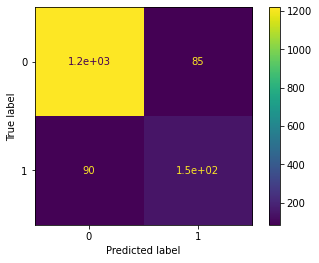

C=0.1, class_weight={0: 4, 1: 1}, oversample=True, max_depth=10
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1303
           1       0.69      0.54      0.60       238

    accuracy                           0.89      1541
   macro avg       0.80      0.75      0.77      1541
weighted avg       0.88      0.89      0.89      1541



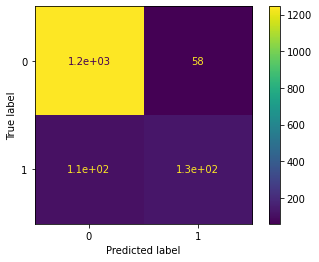

C=0.1, class_weight={0: 4, 1: 1}, oversample=True, max_depth=50
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1303
           1       0.66      0.61      0.63       238

    accuracy                           0.89      1541
   macro avg       0.80      0.77      0.78      1541
weighted avg       0.89      0.89      0.89      1541



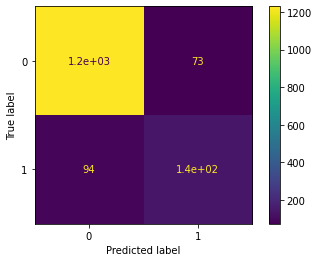

C=0.1, class_weight={0: 4, 1: 1}, oversample=True, max_depth=100
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1303
           1       0.64      0.61      0.62       238

    accuracy                           0.89      1541
   macro avg       0.79      0.77      0.78      1541
weighted avg       0.88      0.89      0.89      1541



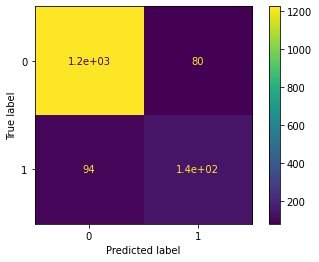

C=0.1, class_weight={0: 4, 1: 1}, oversample=False, max_depth=None
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1303
           1       0.72      0.50      0.59       238

    accuracy                           0.89      1541
   macro avg       0.82      0.73      0.76      1541
weighted avg       0.88      0.89      0.88      1541



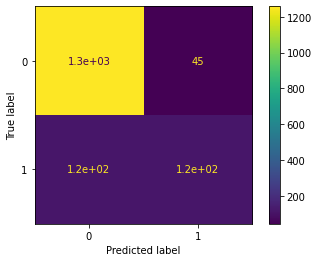

C=0.1, class_weight={0: 4, 1: 1}, oversample=False, max_depth=10
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1303
           1       0.91      0.13      0.23       238

    accuracy                           0.86      1541
   macro avg       0.89      0.56      0.58      1541
weighted avg       0.87      0.86      0.82      1541



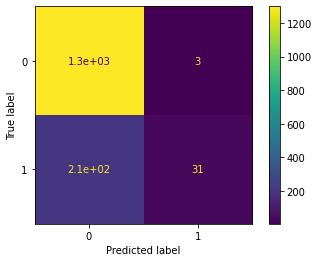

C=0.1, class_weight={0: 4, 1: 1}, oversample=False, max_depth=50
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1303
           1       0.74      0.51      0.61       238

    accuracy                           0.90      1541
   macro avg       0.83      0.74      0.77      1541
weighted avg       0.89      0.90      0.89      1541



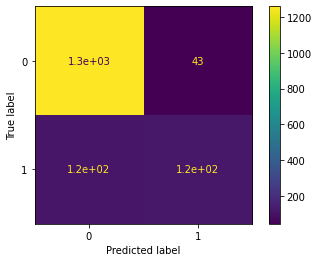

C=0.1, class_weight={0: 4, 1: 1}, oversample=False, max_depth=100
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1303
           1       0.73      0.47      0.57       238

    accuracy                           0.89      1541
   macro avg       0.82      0.72      0.76      1541
weighted avg       0.88      0.89      0.88      1541



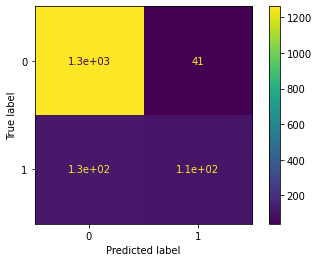

In [ ]:
# trying multiple values of hyperparameters for RandomForest
for n_estimators in [10, 50, 100]:
  for class_weight in [None, 'balanced', {0:2, 1:1}, {0:4, 1:1}]:
    for oversample in [True, False]:
      for max_depth in [None, 10, 50 , 100]:
        # creating a Logistic regression model with default parameters
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, class_weight=class_weight)
        # training the model
        if oversample:
          rf.fit(X_train_oversampled, y_train_oversampled)
        else:
          rf.fit(X_train, y_train)
        print(f"C={C}, class_weight={class_weight}, oversample={oversample}, max_depth={max_depth}")
        # evaluate on the validation set
        print(classification_report(y_val, rf.predict(X_val)))
        plot_confusion_matrix(rf, X_val, y_val)
        plt.show()

C=0.1, learning_rate=0.1, oversample=True, max_depth=None
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.52      0.45      0.49       238

    accuracy                           0.85      1541
   macro avg       0.71      0.69      0.70      1541
weighted avg       0.84      0.85      0.85      1541



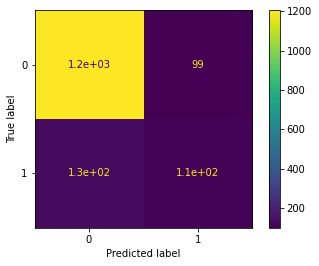

C=0.1, learning_rate=0.1, oversample=True, max_depth=10
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1303
           1       0.53      0.68      0.59       238

    accuracy                           0.86      1541
   macro avg       0.73      0.78      0.75      1541
weighted avg       0.87      0.86      0.86      1541



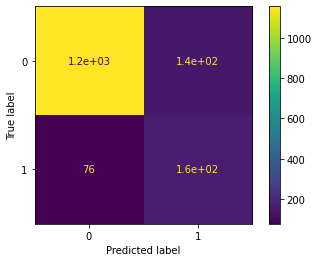

C=0.1, learning_rate=0.1, oversample=True, max_depth=50
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.52      0.45      0.48       238

    accuracy                           0.85      1541
   macro avg       0.71      0.69      0.70      1541
weighted avg       0.84      0.85      0.85      1541



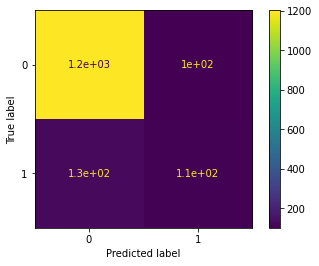

C=0.1, learning_rate=0.1, oversample=True, max_depth=100
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.50      0.45      0.47       238

    accuracy                           0.84      1541
   macro avg       0.70      0.68      0.69      1541
weighted avg       0.84      0.84      0.84      1541



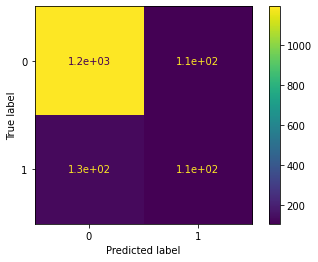

C=0.1, learning_rate=0.1, oversample=False, max_depth=None
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1303
           1       0.57      0.48      0.52       238

    accuracy                           0.86      1541
   macro avg       0.74      0.71      0.72      1541
weighted avg       0.86      0.86      0.86      1541



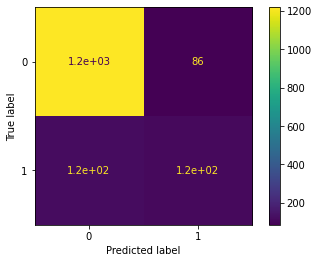

C=0.1, learning_rate=0.1, oversample=False, max_depth=10
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1303
           1       0.73      0.41      0.52       238

    accuracy                           0.89      1541
   macro avg       0.81      0.69      0.73      1541
weighted avg       0.87      0.89      0.87      1541



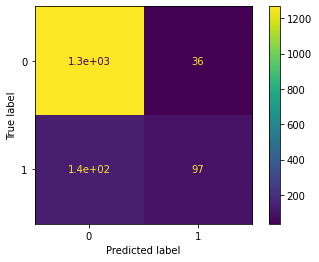

C=0.1, learning_rate=0.1, oversample=False, max_depth=50
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1303
           1       0.58      0.48      0.53       238

    accuracy                           0.87      1541
   macro avg       0.75      0.71      0.73      1541
weighted avg       0.86      0.87      0.86      1541



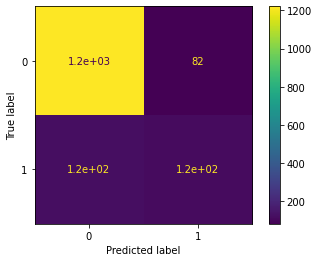

C=0.1, learning_rate=0.1, oversample=False, max_depth=100
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1303
           1       0.58      0.47      0.52       238

    accuracy                           0.87      1541
   macro avg       0.74      0.70      0.72      1541
weighted avg       0.86      0.87      0.86      1541



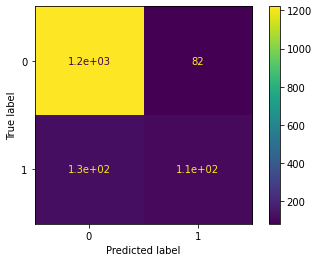

C=0.1, learning_rate=0.01, oversample=True, max_depth=None
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.50      0.44      0.47       238

    accuracy                           0.84      1541
   macro avg       0.70      0.68      0.69      1541
weighted avg       0.84      0.84      0.84      1541



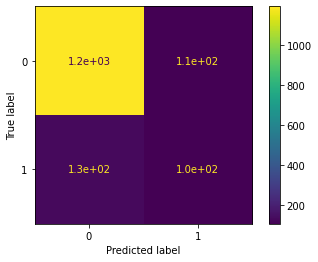

C=0.1, learning_rate=0.01, oversample=True, max_depth=10
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1303
           1       0.49      0.67      0.57       238

    accuracy                           0.84      1541
   macro avg       0.71      0.77      0.74      1541
weighted avg       0.87      0.84      0.85      1541



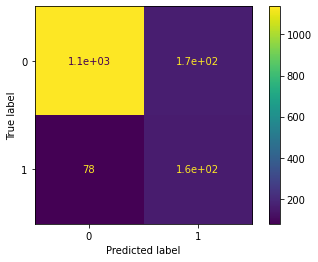

C=0.1, learning_rate=0.01, oversample=True, max_depth=50
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.52      0.47      0.49       238

    accuracy                           0.85      1541
   macro avg       0.71      0.69      0.70      1541
weighted avg       0.85      0.85      0.85      1541



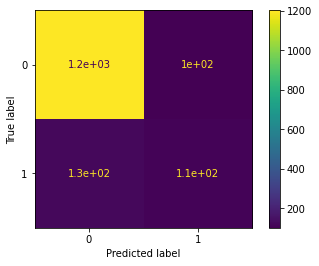

C=0.1, learning_rate=0.01, oversample=True, max_depth=100
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.52      0.45      0.48       238

    accuracy                           0.85      1541
   macro avg       0.71      0.69      0.70      1541
weighted avg       0.84      0.85      0.85      1541



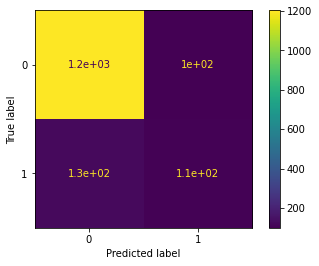

C=0.1, learning_rate=0.01, oversample=False, max_depth=None
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


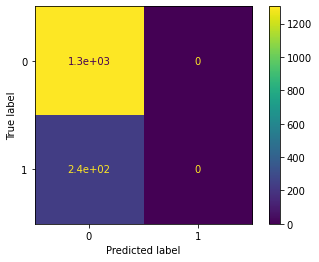

C=0.1, learning_rate=0.01, oversample=False, max_depth=10
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


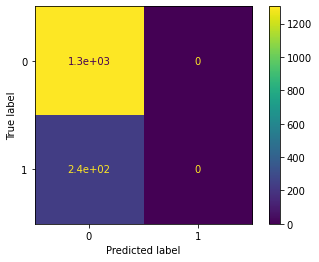

C=0.1, learning_rate=0.01, oversample=False, max_depth=50
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


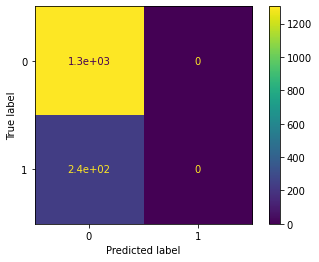

C=0.1, learning_rate=0.01, oversample=False, max_depth=100
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


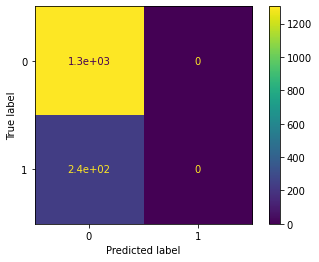

C=0.1, learning_rate=0.0001, oversample=True, max_depth=None
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.51      0.46      0.49       238

    accuracy                           0.85      1541
   macro avg       0.71      0.69      0.70      1541
weighted avg       0.84      0.85      0.85      1541



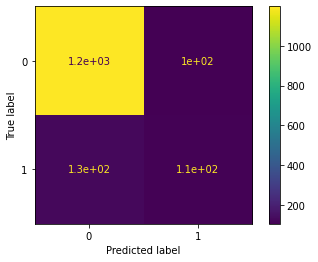

C=0.1, learning_rate=0.0001, oversample=True, max_depth=10
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1303
           1       0.49      0.68      0.57       238

    accuracy                           0.84      1541
   macro avg       0.71      0.77      0.74      1541
weighted avg       0.87      0.84      0.85      1541



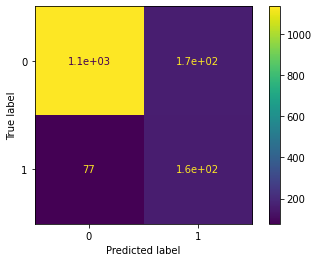

C=0.1, learning_rate=0.0001, oversample=True, max_depth=50
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.51      0.47      0.49       238

    accuracy                           0.85      1541
   macro avg       0.71      0.69      0.70      1541
weighted avg       0.84      0.85      0.85      1541



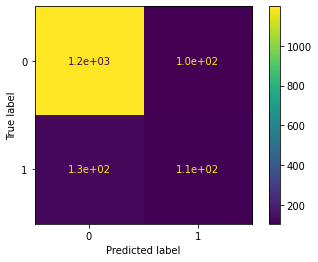

C=0.1, learning_rate=0.0001, oversample=True, max_depth=100
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.51      0.45      0.48       238

    accuracy                           0.85      1541
   macro avg       0.70      0.68      0.69      1541
weighted avg       0.84      0.85      0.84      1541



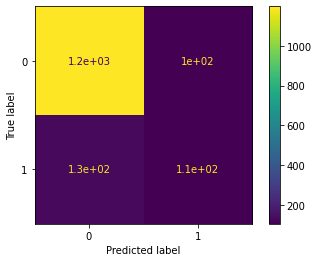

C=0.1, learning_rate=0.0001, oversample=False, max_depth=None
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


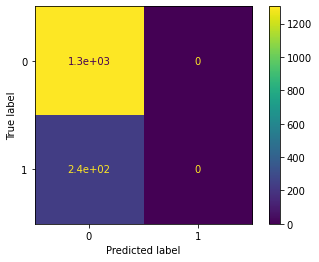

C=0.1, learning_rate=0.0001, oversample=False, max_depth=10
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


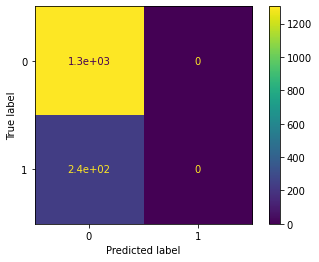

C=0.1, learning_rate=0.0001, oversample=False, max_depth=50
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


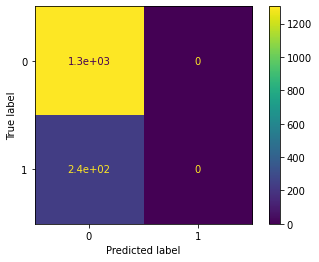

C=0.1, learning_rate=0.0001, oversample=False, max_depth=100
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


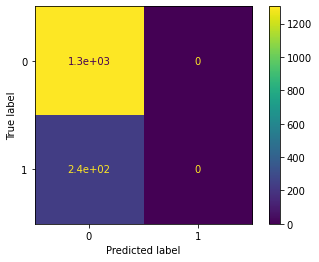

C=0.1, learning_rate=0.1, oversample=True, max_depth=None
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.51      0.45      0.48       238

    accuracy                           0.85      1541
   macro avg       0.71      0.69      0.70      1541
weighted avg       0.84      0.85      0.85      1541



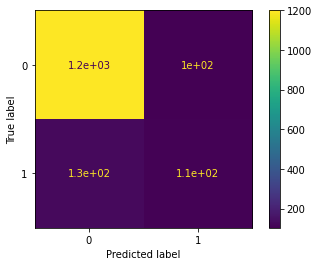

C=0.1, learning_rate=0.1, oversample=True, max_depth=10
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1303
           1       0.58      0.65      0.61       238

    accuracy                           0.87      1541
   macro avg       0.76      0.78      0.77      1541
weighted avg       0.88      0.87      0.88      1541



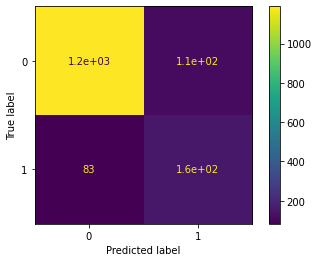

C=0.1, learning_rate=0.1, oversample=True, max_depth=50
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.52      0.45      0.48       238

    accuracy                           0.85      1541
   macro avg       0.71      0.69      0.70      1541
weighted avg       0.84      0.85      0.85      1541



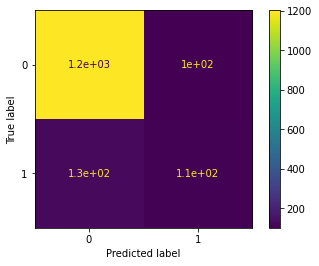

C=0.1, learning_rate=0.1, oversample=True, max_depth=100
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.51      0.44      0.47       238

    accuracy                           0.85      1541
   macro avg       0.71      0.68      0.69      1541
weighted avg       0.84      0.85      0.84      1541



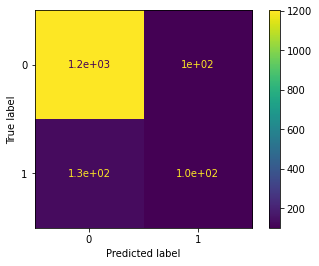

C=0.1, learning_rate=0.1, oversample=False, max_depth=None
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1303
           1       0.55      0.50      0.53       238

    accuracy                           0.86      1541
   macro avg       0.73      0.71      0.72      1541
weighted avg       0.86      0.86      0.86      1541



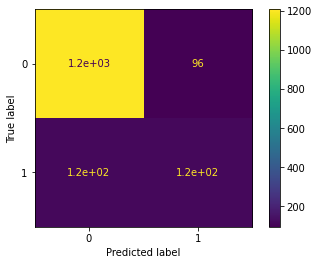

C=0.1, learning_rate=0.1, oversample=False, max_depth=10
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1303
           1       0.68      0.52      0.59       238

    accuracy                           0.89      1541
   macro avg       0.80      0.74      0.76      1541
weighted avg       0.88      0.89      0.88      1541



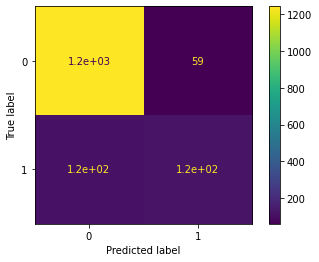

C=0.1, learning_rate=0.1, oversample=False, max_depth=50
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1303
           1       0.56      0.51      0.54       238

    accuracy                           0.86      1541
   macro avg       0.74      0.72      0.73      1541
weighted avg       0.86      0.86      0.86      1541



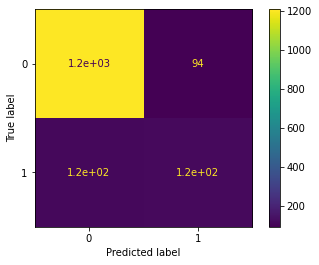

C=0.1, learning_rate=0.1, oversample=False, max_depth=100
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1303
           1       0.56      0.51      0.53       238

    accuracy                           0.86      1541
   macro avg       0.74      0.72      0.73      1541
weighted avg       0.86      0.86      0.86      1541



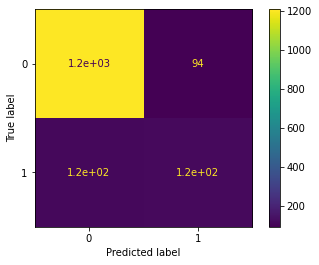

C=0.1, learning_rate=0.01, oversample=True, max_depth=None
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.50      0.45      0.48       238

    accuracy                           0.85      1541
   macro avg       0.70      0.69      0.69      1541
weighted avg       0.84      0.85      0.84      1541



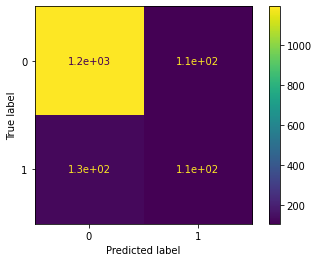

C=0.1, learning_rate=0.01, oversample=True, max_depth=10
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1303
           1       0.51      0.66      0.58       238

    accuracy                           0.85      1541
   macro avg       0.72      0.77      0.74      1541
weighted avg       0.87      0.85      0.86      1541



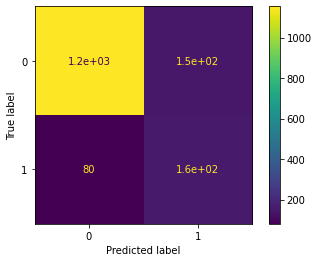

C=0.1, learning_rate=0.01, oversample=True, max_depth=50
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.52      0.47      0.49       238

    accuracy                           0.85      1541
   macro avg       0.71      0.69      0.70      1541
weighted avg       0.85      0.85      0.85      1541



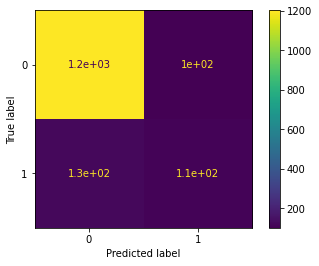

C=0.1, learning_rate=0.01, oversample=True, max_depth=100
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.51      0.45      0.48       238

    accuracy                           0.85      1541
   macro avg       0.70      0.68      0.69      1541
weighted avg       0.84      0.85      0.84      1541



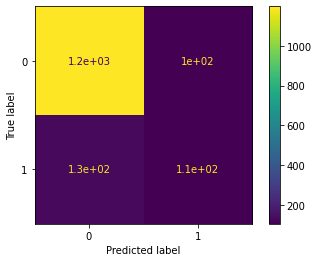

C=0.1, learning_rate=0.01, oversample=False, max_depth=None
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


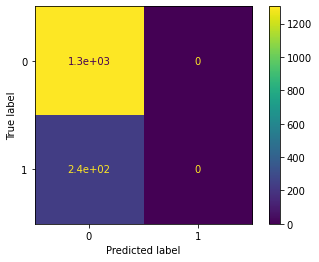

C=0.1, learning_rate=0.01, oversample=False, max_depth=10
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       1.00      0.01      0.02       238

    accuracy                           0.85      1541
   macro avg       0.92      0.50      0.47      1541
weighted avg       0.87      0.85      0.78      1541



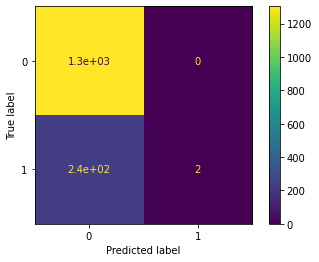

C=0.1, learning_rate=0.01, oversample=False, max_depth=50
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


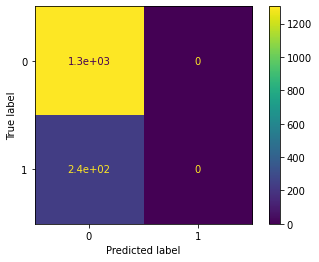

C=0.1, learning_rate=0.01, oversample=False, max_depth=100
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


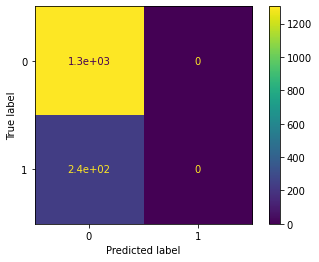

C=0.1, learning_rate=0.0001, oversample=True, max_depth=None
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.50      0.45      0.48       238

    accuracy                           0.85      1541
   macro avg       0.70      0.69      0.69      1541
weighted avg       0.84      0.85      0.84      1541



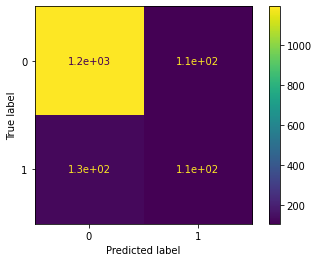

C=0.1, learning_rate=0.0001, oversample=True, max_depth=10
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1303
           1       0.48      0.67      0.56       238

    accuracy                           0.84      1541
   macro avg       0.71      0.77      0.73      1541
weighted avg       0.87      0.84      0.85      1541



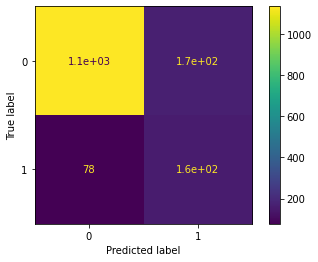

C=0.1, learning_rate=0.0001, oversample=True, max_depth=50
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.51      0.45      0.48       238

    accuracy                           0.85      1541
   macro avg       0.70      0.69      0.69      1541
weighted avg       0.84      0.85      0.84      1541



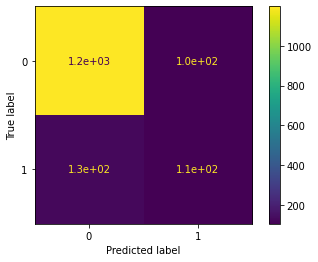

C=0.1, learning_rate=0.0001, oversample=True, max_depth=100
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.51      0.45      0.48       238

    accuracy                           0.85      1541
   macro avg       0.71      0.69      0.70      1541
weighted avg       0.84      0.85      0.84      1541



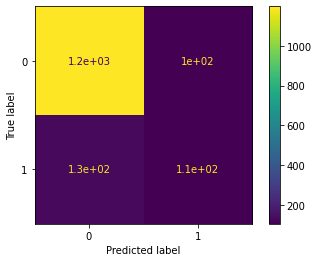

C=0.1, learning_rate=0.0001, oversample=False, max_depth=None
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


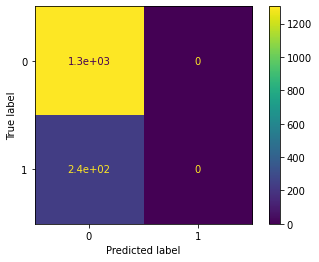

C=0.1, learning_rate=0.0001, oversample=False, max_depth=10
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


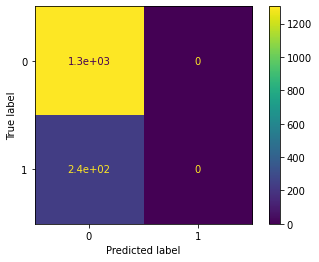

C=0.1, learning_rate=0.0001, oversample=False, max_depth=50
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


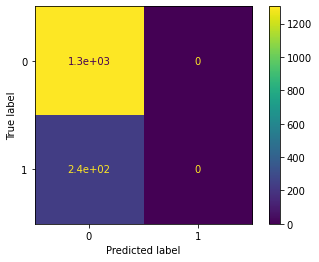

C=0.1, learning_rate=0.0001, oversample=False, max_depth=100
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


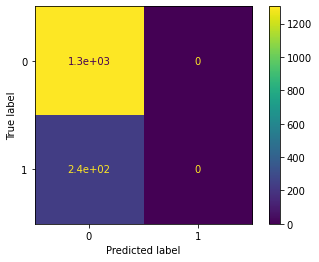

C=0.1, learning_rate=0.1, oversample=True, max_depth=None
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.52      0.46      0.49       238

    accuracy                           0.85      1541
   macro avg       0.71      0.69      0.70      1541
weighted avg       0.85      0.85      0.85      1541



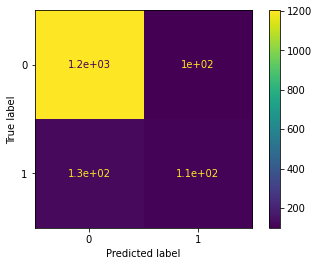

C=0.1, learning_rate=0.1, oversample=True, max_depth=10
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1303
           1       0.60      0.62      0.61       238

    accuracy                           0.88      1541
   macro avg       0.76      0.77      0.77      1541
weighted avg       0.88      0.88      0.88      1541



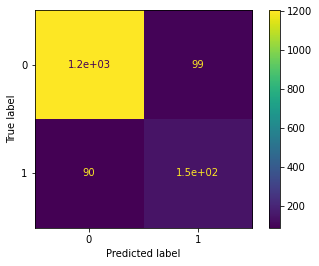

C=0.1, learning_rate=0.1, oversample=True, max_depth=50
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.52      0.47      0.49       238

    accuracy                           0.85      1541
   macro avg       0.71      0.69      0.70      1541
weighted avg       0.85      0.85      0.85      1541



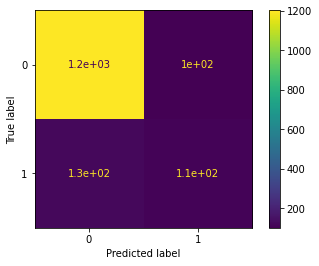

C=0.1, learning_rate=0.1, oversample=True, max_depth=100
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.52      0.46      0.49       238

    accuracy                           0.85      1541
   macro avg       0.71      0.69      0.70      1541
weighted avg       0.84      0.85      0.85      1541



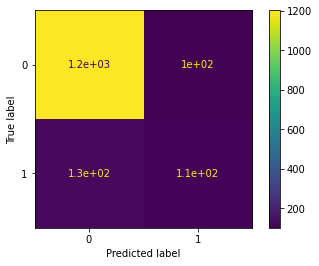

C=0.1, learning_rate=0.1, oversample=False, max_depth=None
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1303
           1       0.56      0.50      0.53       238

    accuracy                           0.86      1541
   macro avg       0.73      0.72      0.72      1541
weighted avg       0.86      0.86      0.86      1541



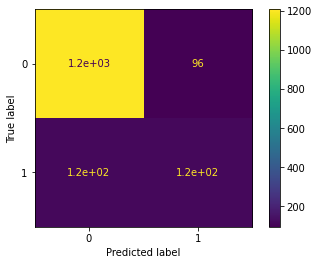

C=0.1, learning_rate=0.1, oversample=False, max_depth=10
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1303
           1       0.68      0.55      0.61       238

    accuracy                           0.89      1541
   macro avg       0.80      0.75      0.77      1541
weighted avg       0.88      0.89      0.89      1541



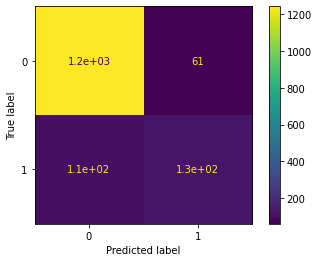

C=0.1, learning_rate=0.1, oversample=False, max_depth=50
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1303
           1       0.57      0.52      0.55       238

    accuracy                           0.87      1541
   macro avg       0.74      0.72      0.73      1541
weighted avg       0.86      0.87      0.86      1541



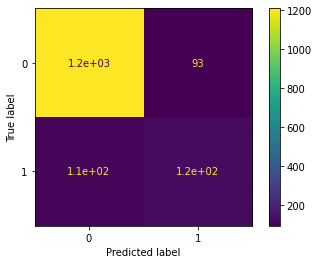

C=0.1, learning_rate=0.1, oversample=False, max_depth=100
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1303
           1       0.57      0.51      0.54       238

    accuracy                           0.86      1541
   macro avg       0.74      0.72      0.73      1541
weighted avg       0.86      0.86      0.86      1541



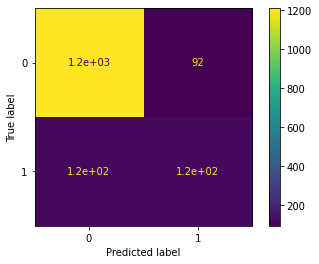

C=0.1, learning_rate=0.01, oversample=True, max_depth=None
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.51      0.47      0.49       238

    accuracy                           0.85      1541
   macro avg       0.71      0.69      0.70      1541
weighted avg       0.84      0.85      0.85      1541



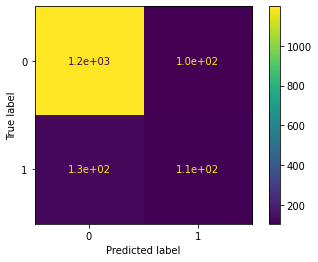

C=0.1, learning_rate=0.01, oversample=True, max_depth=10
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1303
           1       0.53      0.68      0.60       238

    accuracy                           0.86      1541
   macro avg       0.74      0.79      0.76      1541
weighted avg       0.88      0.86      0.87      1541



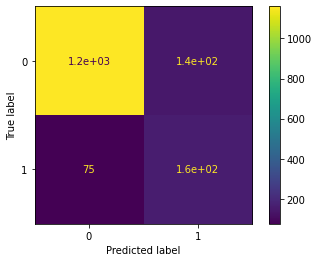

C=0.1, learning_rate=0.01, oversample=True, max_depth=50
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.51      0.46      0.48       238

    accuracy                           0.85      1541
   macro avg       0.71      0.69      0.70      1541
weighted avg       0.84      0.85      0.85      1541



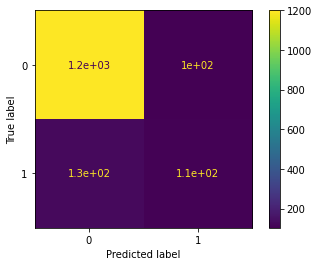

C=0.1, learning_rate=0.01, oversample=True, max_depth=100
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.51      0.46      0.48       238

    accuracy                           0.85      1541
   macro avg       0.71      0.69      0.70      1541
weighted avg       0.84      0.85      0.85      1541



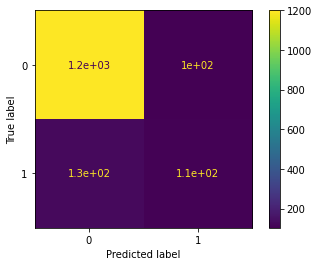

C=0.1, learning_rate=0.01, oversample=False, max_depth=None
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1303
           1       0.58      0.46      0.52       238

    accuracy                           0.87      1541
   macro avg       0.74      0.70      0.72      1541
weighted avg       0.86      0.87      0.86      1541



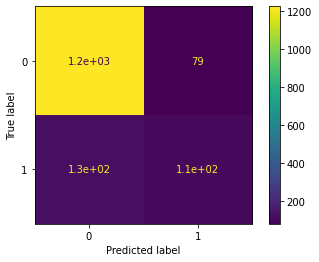

C=0.1, learning_rate=0.01, oversample=False, max_depth=10
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1303
           1       0.74      0.40      0.52       238

    accuracy                           0.89      1541
   macro avg       0.82      0.69      0.73      1541
weighted avg       0.87      0.89      0.87      1541



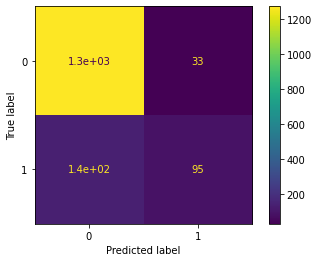

C=0.1, learning_rate=0.01, oversample=False, max_depth=50
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1303
           1       0.58      0.46      0.51       238

    accuracy                           0.86      1541
   macro avg       0.74      0.70      0.72      1541
weighted avg       0.85      0.86      0.86      1541



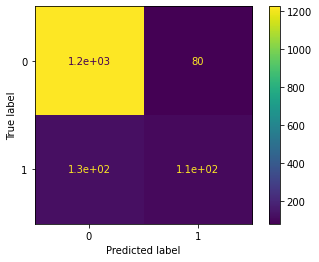

C=0.1, learning_rate=0.01, oversample=False, max_depth=100
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1303
           1       0.58      0.46      0.51       238

    accuracy                           0.87      1541
   macro avg       0.74      0.70      0.72      1541
weighted avg       0.86      0.87      0.86      1541



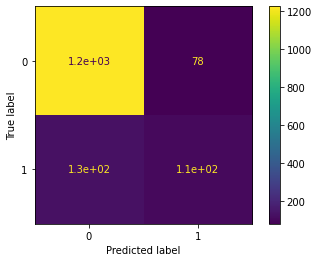

C=0.1, learning_rate=0.0001, oversample=True, max_depth=None
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.50      0.45      0.48       238

    accuracy                           0.85      1541
   macro avg       0.70      0.68      0.69      1541
weighted avg       0.84      0.85      0.84      1541



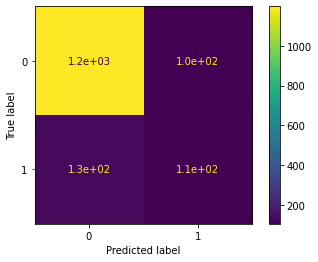

C=0.1, learning_rate=0.0001, oversample=True, max_depth=10
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1303
           1       0.49      0.67      0.56       238

    accuracy                           0.84      1541
   macro avg       0.71      0.77      0.73      1541
weighted avg       0.87      0.84      0.85      1541



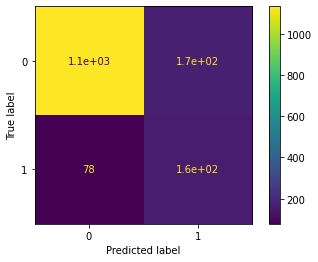

C=0.1, learning_rate=0.0001, oversample=True, max_depth=50
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.50      0.46      0.48       238

    accuracy                           0.85      1541
   macro avg       0.70      0.69      0.70      1541
weighted avg       0.84      0.85      0.84      1541



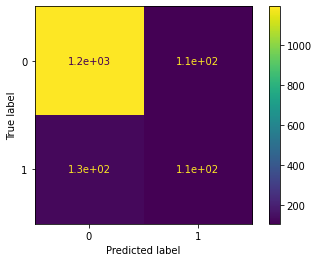

C=0.1, learning_rate=0.0001, oversample=True, max_depth=100
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1303
           1       0.51      0.46      0.49       238

    accuracy                           0.85      1541
   macro avg       0.71      0.69      0.70      1541
weighted avg       0.84      0.85      0.85      1541



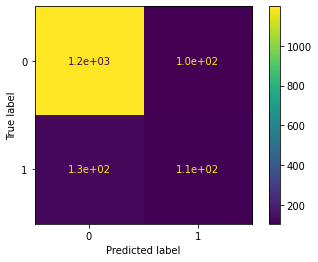

C=0.1, learning_rate=0.0001, oversample=False, max_depth=None
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


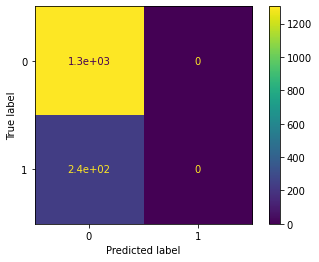

C=0.1, learning_rate=0.0001, oversample=False, max_depth=10
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


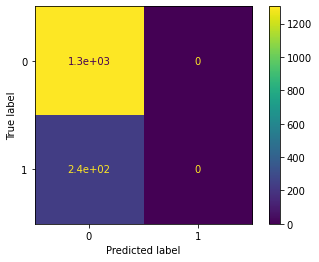

C=0.1, learning_rate=0.0001, oversample=False, max_depth=50
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


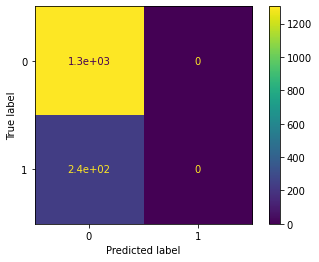

C=0.1, learning_rate=0.0001, oversample=False, max_depth=100
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1303
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1541
   macro avg       0.42      0.50      0.46      1541
weighted avg       0.71      0.85      0.77      1541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


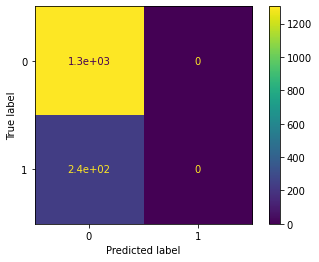

In [ ]:
# trying multiple values of hyperparameters for Gradient boosted tree
for n_estimators in [10, 50, 100]:
  for learning_rate in [0.1, 0.01, 0.0001]:
    for oversample in [True, False]:
      for max_depth in [None, 10, 50 , 100]:
        # creating a Gradient boosted tree model with default parameters
        gb = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
        # training the model
        if oversample:
          gb.fit(X_train_oversampled, y_train_oversampled)
        else:
          gb.fit(X_train, y_train)
        print(f"C={C}, learning_rate={learning_rate}, oversample={oversample}, max_depth={max_depth}")
        # evaluate on the validation set
        print(classification_report(y_val, gb.predict(X_val)))
        plot_confusion_matrix(gb, X_val, y_val)
        plt.show()

The best model so far was a random forest with an F1 score on positives of 0.67. It was with n_estimators=100, class_weight=None, oversample=True, max_depth=10

In [ ]:
# trying multiple values of hyperparameters for neural network
for hidden_layer_sizes in [[10], [10,15], [10, 15, 10]]:
  for learning_rate in [0.01,0.001, 0.0001]:
    for oversample in [True, False]:
      for activation in ['logistic', 'relu', 'tanh']:
        nn = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, learning_rate_init=learning_rate)
        # training the model
        if oversample:
          nn.fit(X_train_oversampled, y_train_oversampled)
        else:
          nn.fit(X_train, y_train)
        print(f"learning_rate={learning_rate}, oversample={oversample}, activation={activation}, hidden_layer_sizes={hidden_layer_sizes}")
        # evaluate on the validation set
        print(classification_report(y_val, nn.predict(X_val)))
        plot_confusion_matrix(nn, X_val, y_val)
        plt.show()

With neural networks, the best result we got so far was 0.64 F1 score on the positive examples. Therefore, the best model is still Random forest.

Validation set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1303
           1       0.53      0.78      0.63       238

    accuracy                           0.86      1541
   macro avg       0.74      0.83      0.77      1541
weighted avg       0.89      0.86      0.87      1541



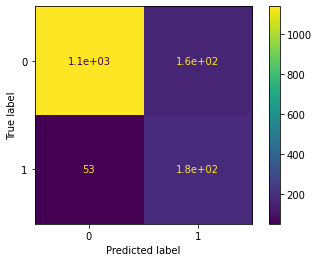

Test set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1303
           1       0.55      0.85      0.67       239

    accuracy                           0.87      1542
   macro avg       0.76      0.86      0.80      1542
weighted avg       0.91      0.87      0.88      1542



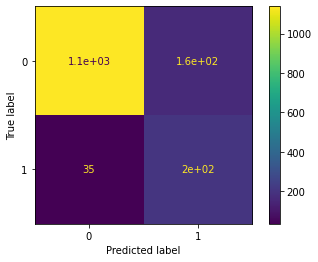

In [ ]:
# Evaluation the best model on the test set
rf = RandomForestClassifier(n_estimators=100, class_weight=None, max_depth=10)
# training the model
rf.fit(X_train_oversampled, y_train_oversampled)
# evaluate on the validation set
print('Validation set')
print(classification_report(y_val, rf.predict(X_val)))
plot_confusion_matrix(rf, X_val, y_val)
plt.show()
# evaluate on the test set
print('Test set')
print(classification_report(y_test, rf.predict(X_test)))
plot_confusion_matrix(rf, X_test, y_test)
plt.show()

The best model has an F1 score of 0.65 on the postive examples on the test set.